In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/Regression/house_prices_single_model')
import json
import pandas as pd
import yaml
import pickle
import os
from utils.feat_eng_pipeline import feat_eng_pipeline
from sklearn.model_selection import train_test_split


# Load config file
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/regression/house_prices_single_model\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)


In [2]:
params = {
        'input_data':os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['input']),                
        'output_x_train' : os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['X_train']),        
        'output_x_val' : os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['X_val']),        
        'output_y_train' : os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['y_train']),        
        'output_y_val' : os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['y_val']),       
        'random_state' : config['feat_selection_params']['random_state'],
        'val_size' : config['feat_selection_params']['val_size'],
        'cols_2_drop' : config['feat_selection_params']['cols_2_drop'],
        'num_var_1' : config['feat_selection_params']['num_var_1'],
        'num_var_2' : config['feat_selection_params']['num_var_2'],
        'cat_var':config['feat_selection_params']['cat_var'],
        'target':config['feat_selection_params']['target'],
        'pipe':config['pipe_feat_eng']['path'], 
        'reports':config['save_reports']['path_reports'],
        'pipe_version':config['feat_selection_params']['pipe_version']        
        }

In [3]:
df = pd.read_parquet(params['input_data'])
df.drop(
        columns=params['cols_2_drop'], 
        inplace=True)  

In [4]:
print('Split data into train and validation')
X_train, X_val, y_train, y_val =  train_test_split(
    df.drop(columns=params['target']), 
    df[params['target']],
    test_size=params['val_size'], 
    random_state=params['random_state'])

pipe = feat_eng_pipeline(
    num_var_1=params['num_var_1'],
    num_var_2=params['num_var_2'],
    cat_var=params['cat_var']
    )

Split data into train and validation


In [5]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition
979,20,RL,80.0,8816,Reg,Lvl,Corner,Gtl,Sawyer,Feedr,...,TA,TA,Y,0,80,0,6,2009,WD,Normal
357,120,RM,44.0,4224,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,TA,TA,Y,536,90,0,8,2007,WD,Normal
1318,20,RL,NaN,14781,IR2,Lvl,CulDSac,Gtl,CollgCr,Norm,...,TA,TA,Y,198,150,0,8,2006,WD,Normal
346,20,RL,NaN,12772,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,...,TA,TA,Y,0,0,0,4,2007,WD,Normal
1284,50,RL,50.0,9638,Reg,Lvl,Inside,Gtl,SWISU,Feedr,...,TA,TA,Y,272,0,42,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,20,RL,NaN,8544,IR1,Lvl,CulDSac,Gtl,Sawyer,Norm,...,TA,TA,Y,0,65,0,6,2008,WD,Normal
950,20,RL,60.0,7200,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,194,0,0,7,2007,WD,Normal
1064,20,RL,NaN,11000,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,...,TA,TA,Y,0,58,0,11,2009,WD,Normal
742,20,RL,65.0,8450,Reg,Lvl,Inside,Gtl,SawyerW,Norm,...,TA,TA,Y,120,55,0,12,2007,WD,Normal


In [6]:
pipe.fit(X_train, y_train)
X_train_trans = pipe.transform(X_train)
X_val_trans = pipe.transform(X_val)

TypeError: Some of the variables are not numerical. Please cast them as numerical before using this transformer.

In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/regression/house_prices_single_model')

In [2]:
import pandas as pd
import yaml

In [3]:
# Carregando as configurações do arquivo YAML
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/regression/house_prices_single_model\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)


In [4]:
from utils.graphs import plot_numerical_data, plot_categorical_data

In [5]:
params = {
       
        'random_state' : config['feat_selection_params']['random_state'],
        'val_size' : config['feat_selection_params']['val_size'],
        'cols_2_drop' : config['feat_selection_params']['cols_2_drop'],
        'cat_var' : config['feat_selection_params']['cat_var'],
        'num_var_1' : config['feat_selection_params']['num_var_1'],
        'num_var_2' : config['feat_selection_params']['num_var_2'],
   
        'target':config['feat_selection_params']['target'],
        'pipe':config['pipe_feat_eng']['path'], 
        'reports':config['save_reports']['path_reports'],
        'pipe_version':config['feat_selection_params']['pipe_version']        
        }

In [10]:
from sklearn.pipeline import make_pipeline
from feature_engine.imputation import MeanMedianImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from feature_engine.transformation import LogCpTransformer
from sklearn.preprocessing import MinMaxScaler
from feature_engine.discretisation import DecisionTreeDiscretiser
from utils.functions import MedianByYTransformer
from feature_engine.encoding import OneHotEncoder, RareLabelEncoder, OrdinalEncoder, WoEEncoder
from feature_engine.scaling import MeanNormalizationScaler
from feature_engine.imputation import CategoricalImputer


In [11]:
def feat_eng_pipeline(
    num_var_1:list,
    num_var_2:list,
    cat_var:list
   ):
    
    # numerical var
    median_var_1 = MeanMedianImputer(
        imputation_method = 'median',
        variables = num_var_1)
    
    
    # numerical var 2
    # log transformation
    log_transf = LogCpTransformer(variables=num_var_2)  
    
    # outlier treatment
    outlier = Winsorizer(variables=num_var_2, capping_method='iqr')
    
    median_var_2 = MeanMedianImputer(
        imputation_method = 'median',
        variables = num_var_2)
    
    num_2_pipe = make_pipeline(
        median_var_2,
        outlier,
        log_transf                     
        )
    
     # nominal var
    cat_imputer = make_pipeline(
        CategoricalImputer(
        imputation_method = 'missing',
        fill_value = 'missing', 
        variables = cat_var
        ))

    encoder = make_pipeline(
        OneHotEncoder(
        variables = cat_var, 
        drop_last = True
        ))

    rare_label = make_pipeline(
        RareLabelEncoder(
        variables=cat_var,
        tol=.1,
        n_categories=2
    ))
    
    categorical_pipe = make_pipeline(cat_imputer, rare_label, encoder)
    
    
    preprocessor  = ColumnTransformer(
        transformers = [
            ("num_pipe_1", median_var_1, num_var_1),
            ("num_pipe_2", num_2_pipe, num_var_2),
            ("categorical_pipe", categorical_pipe, cat_var)
            ])
    
    pipe = make_pipeline(   
        preprocessor.set_output(transform="pandas")       
        )      
    
    return pipe

In [8]:
df = pd.read_csv(r'..\data\raw\train.csv')

In [12]:
pipe = feat_eng_pipeline(
    num_var_1 = params['num_var_1'], 
    num_var_2 = params['num_var_2'],
    cat_var=params['cat_var'])

In [13]:
pipe

,steps,"[('columntransformer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_pipe_1', ...), ('num_pipe_2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
df_t = pipe.fit_transform(df)

c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable CentralAir is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [18]:
df_t.shape

(1460, 91)

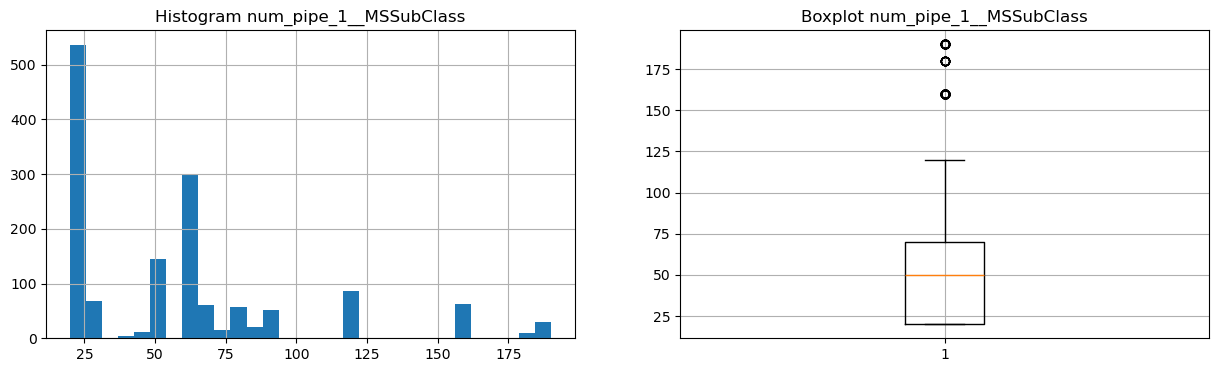

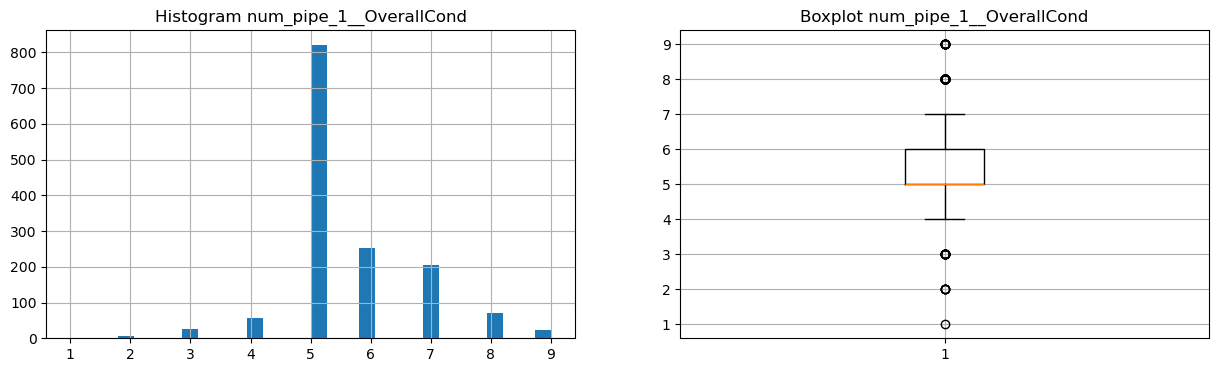

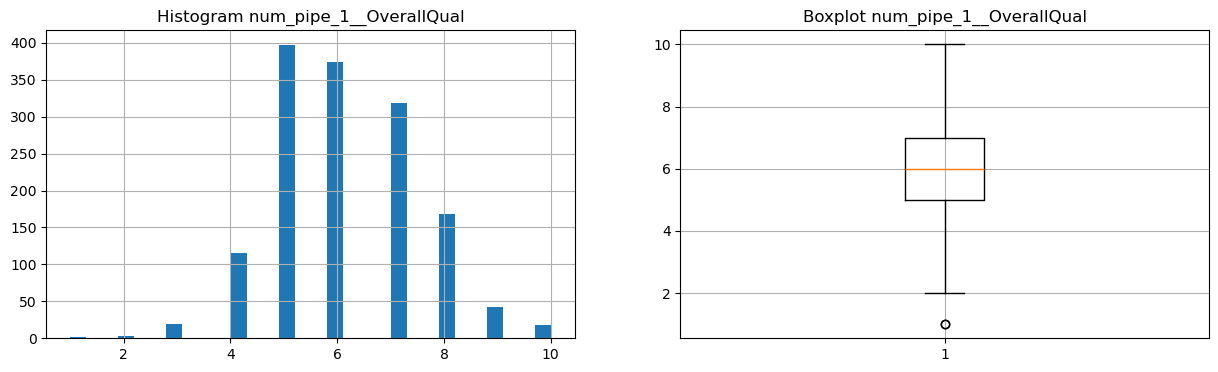

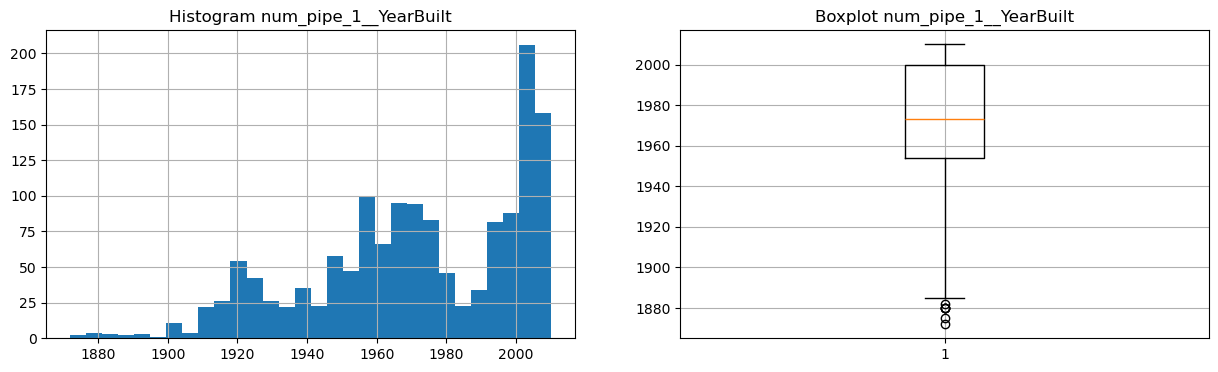

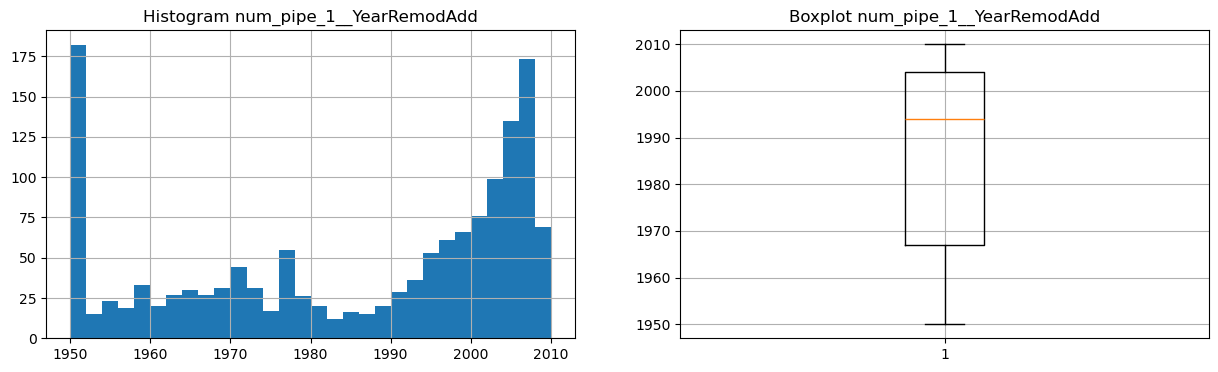

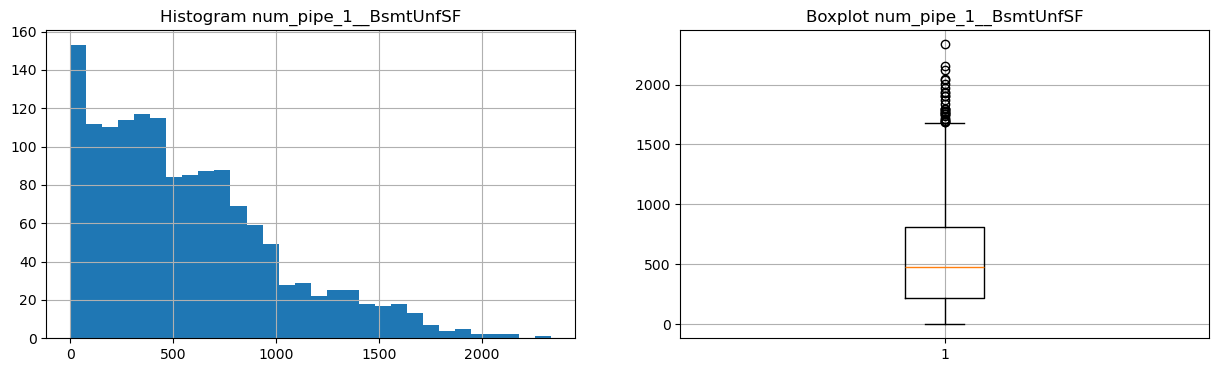

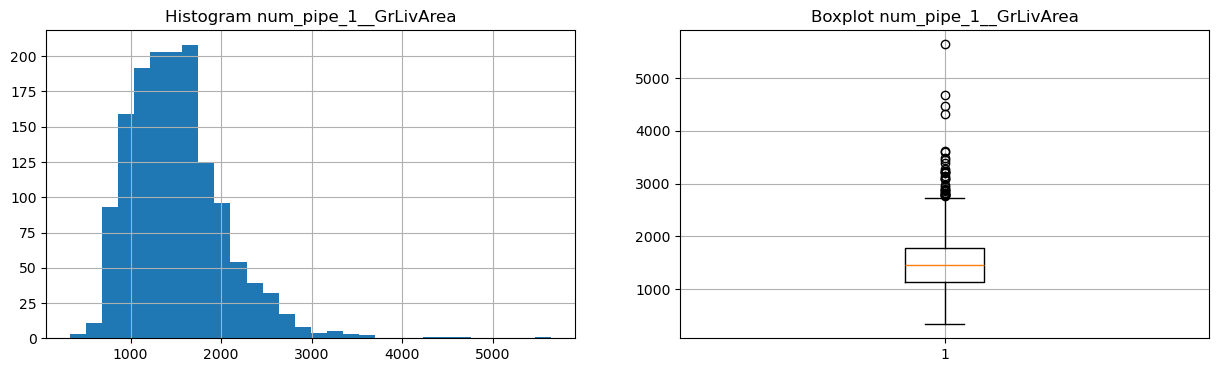

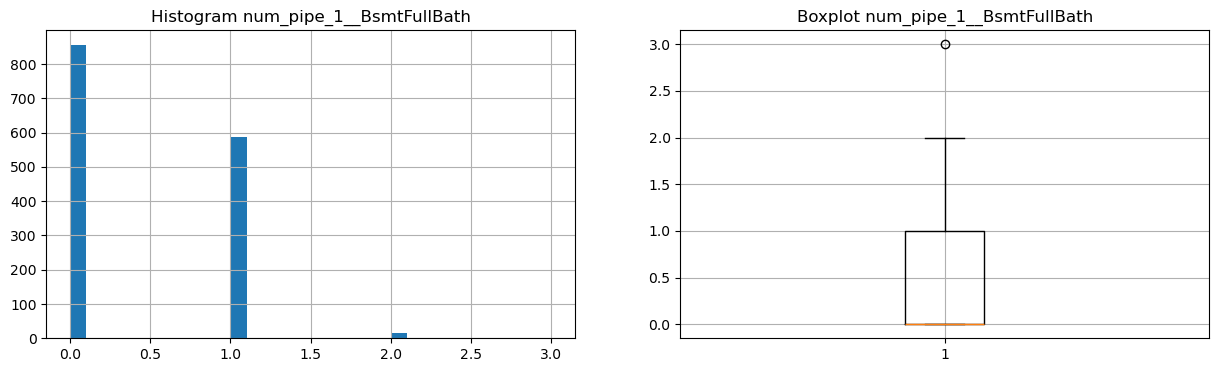

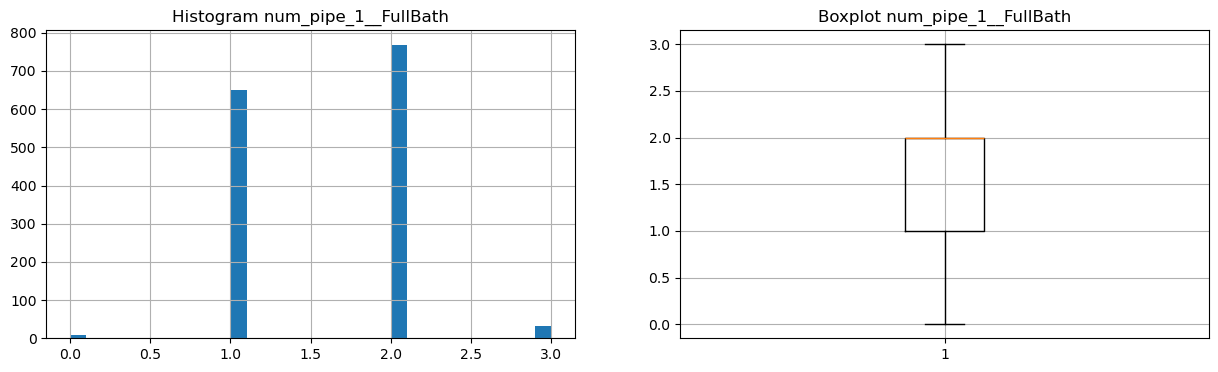

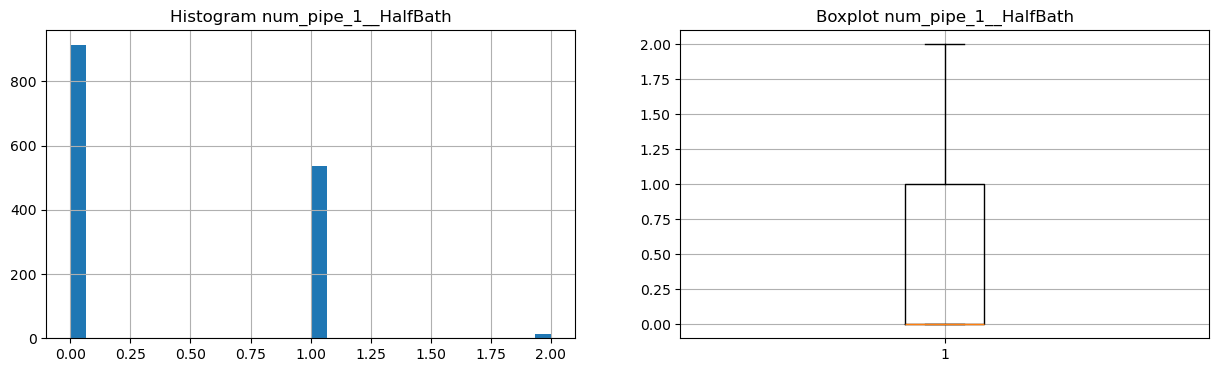

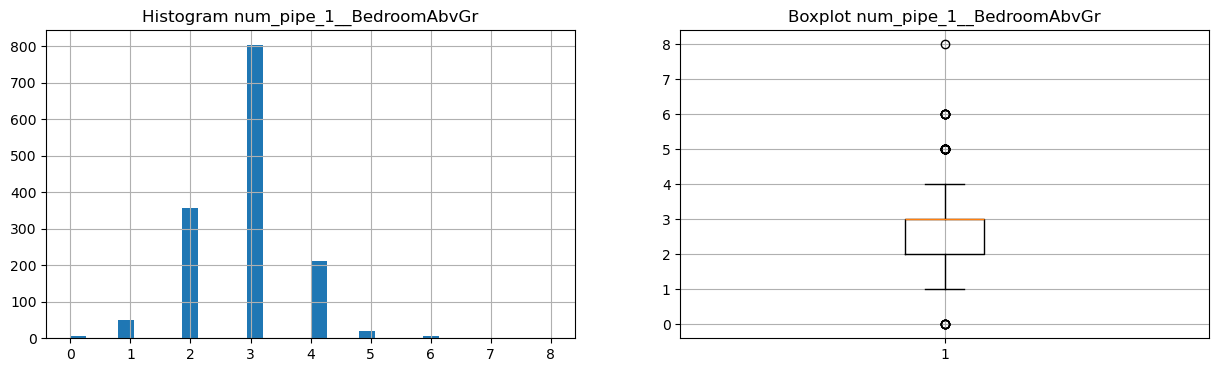

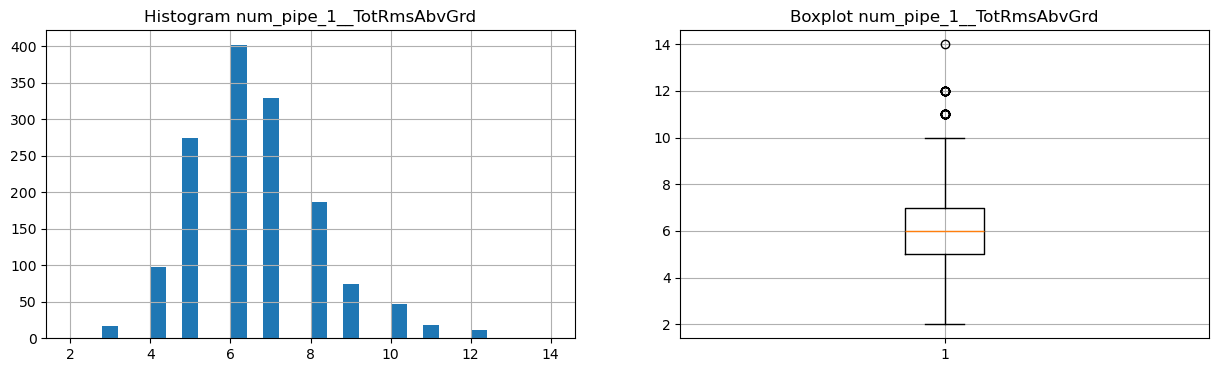

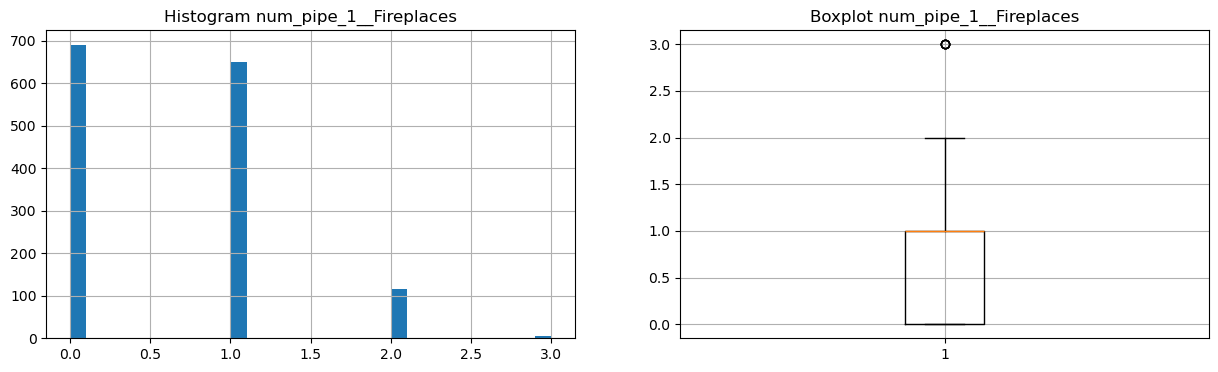

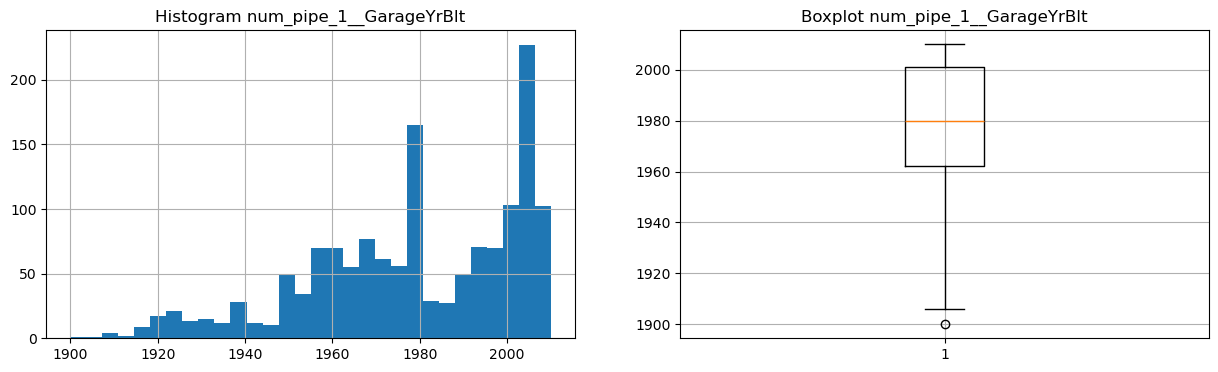

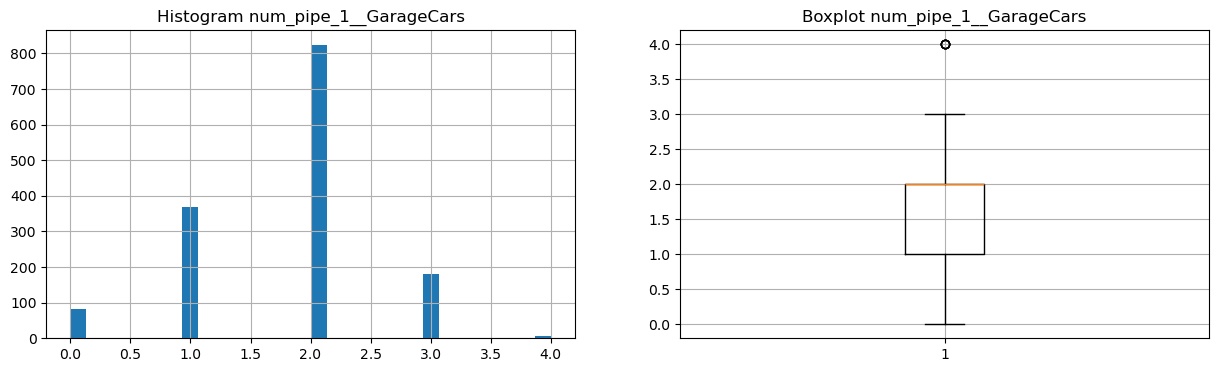

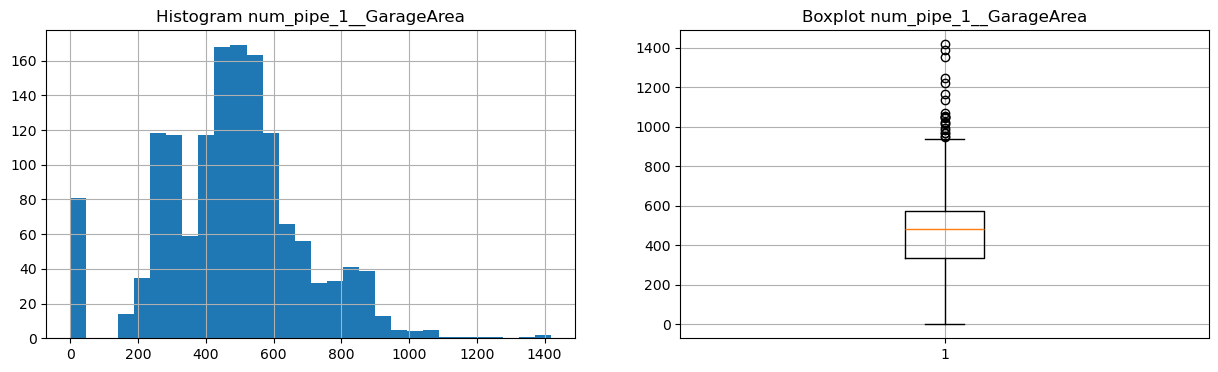

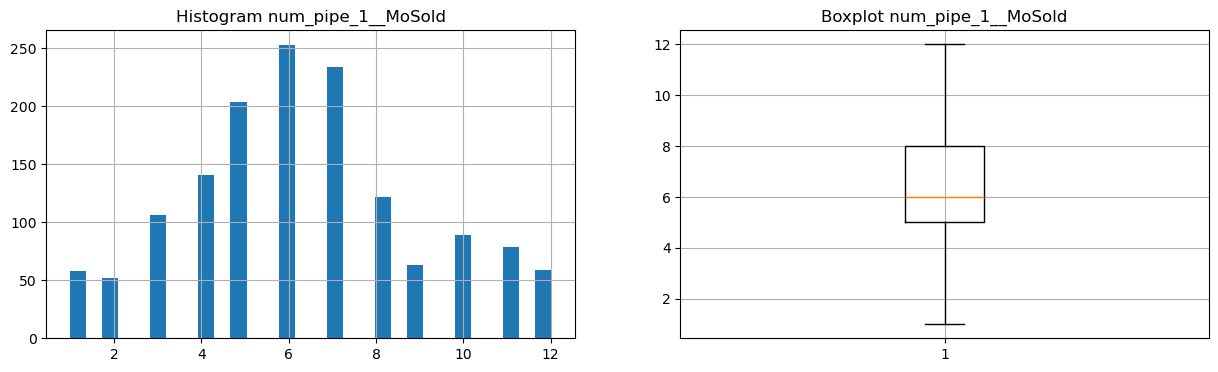

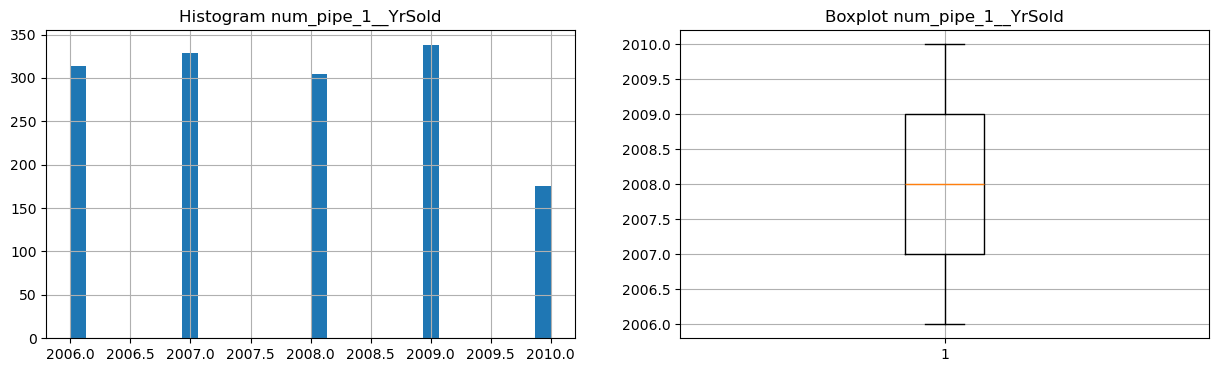

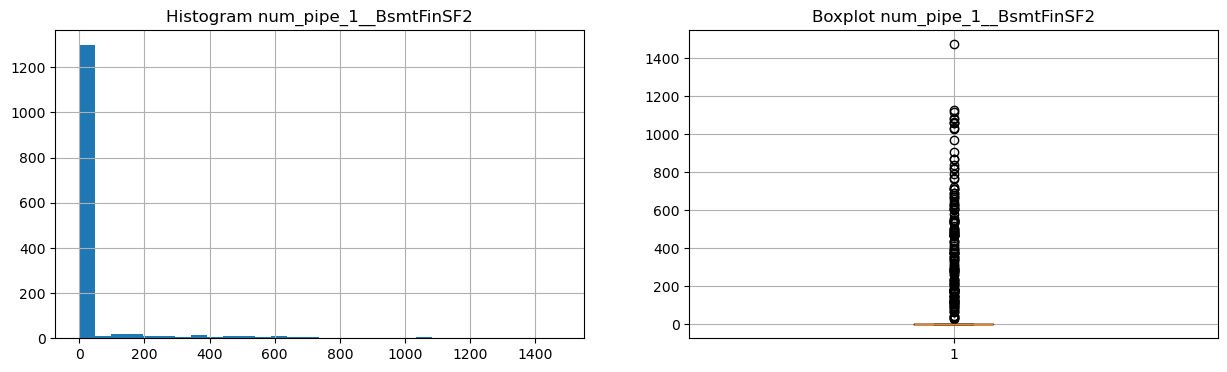

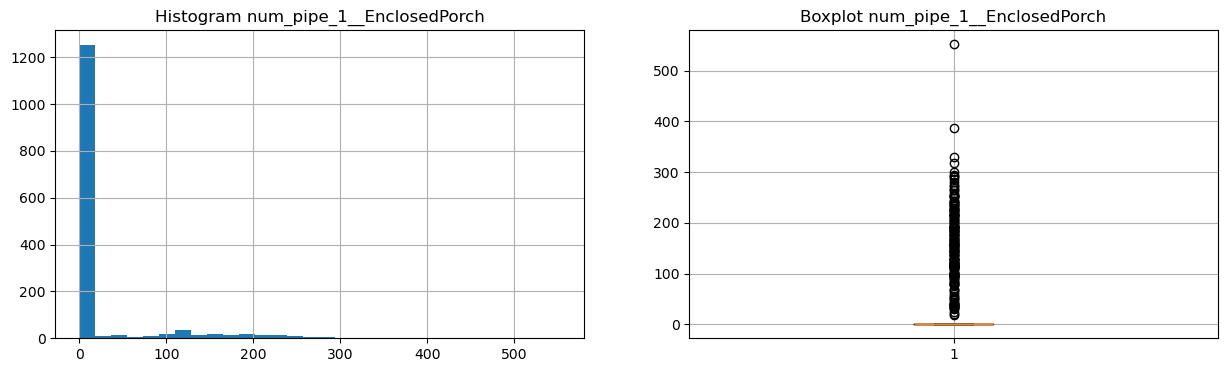

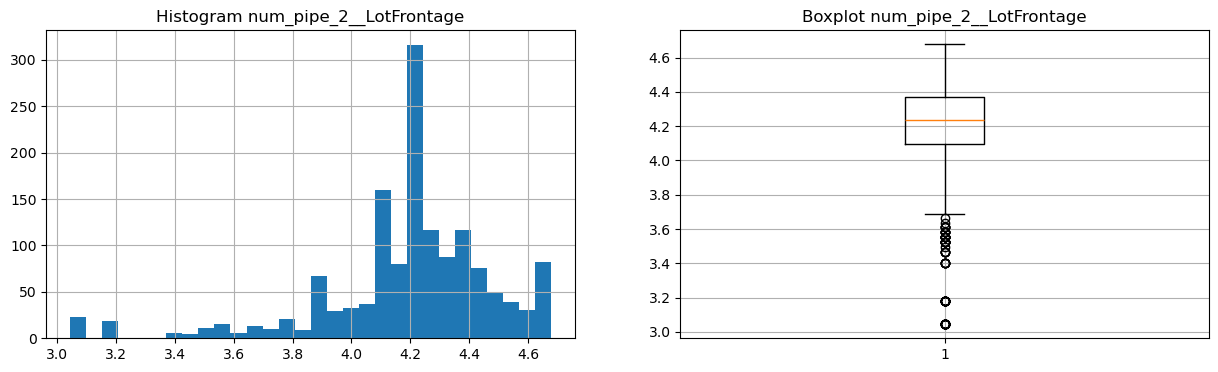

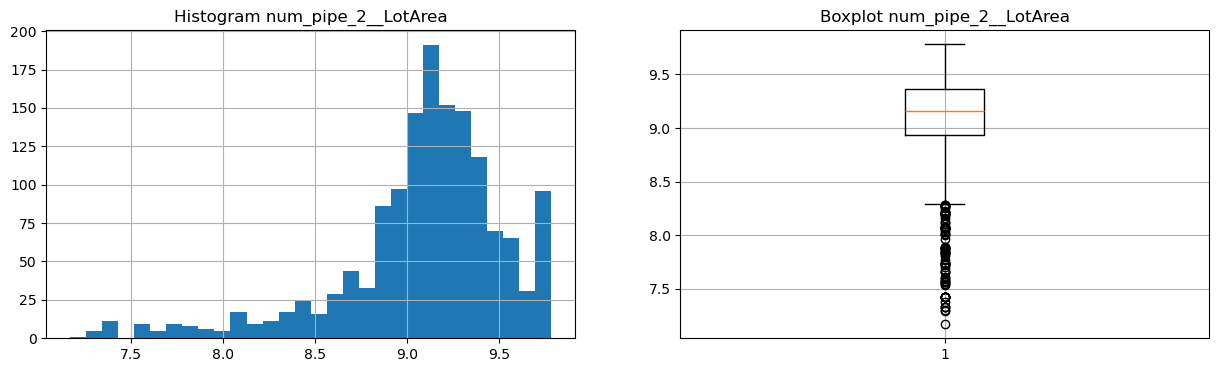

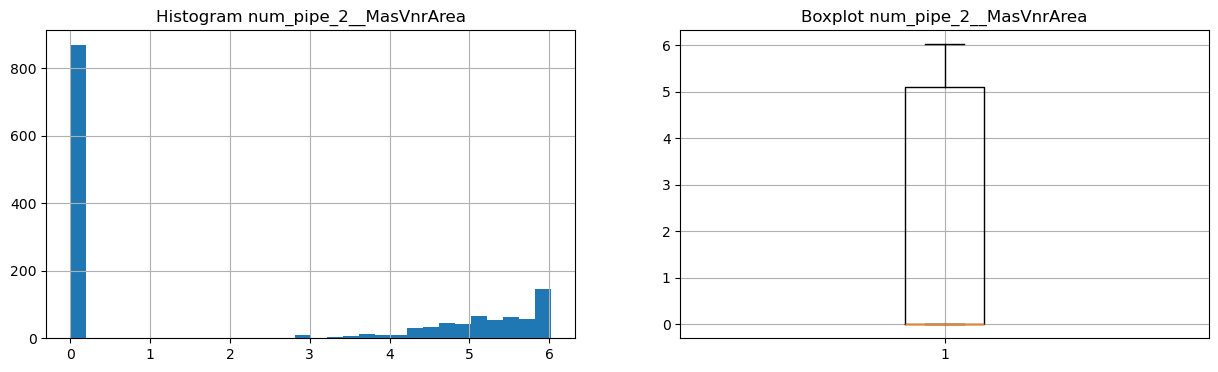

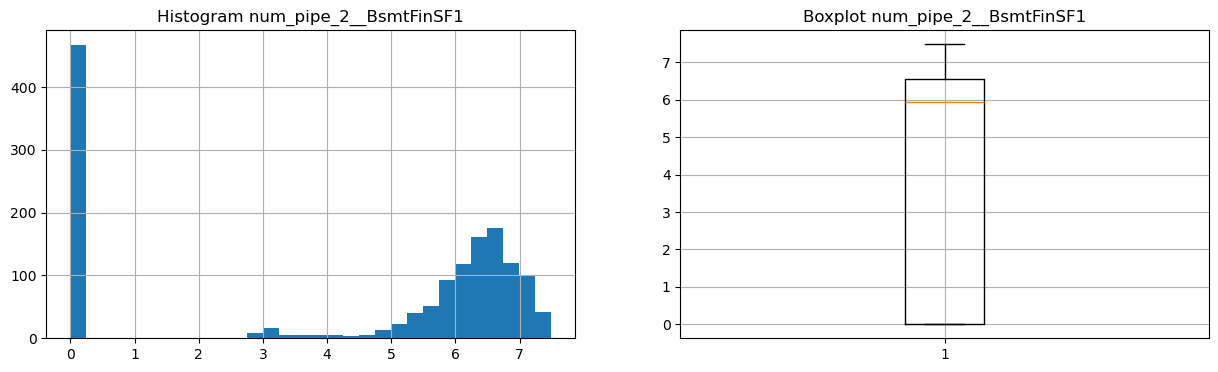

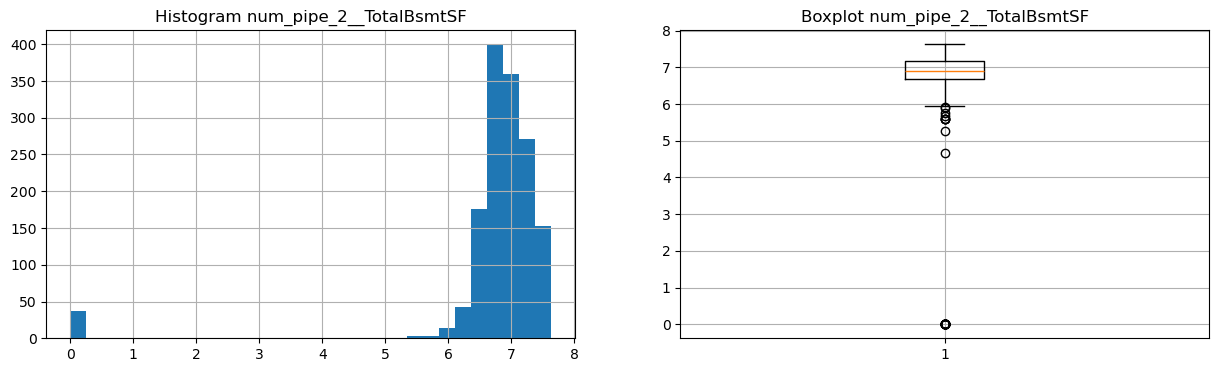

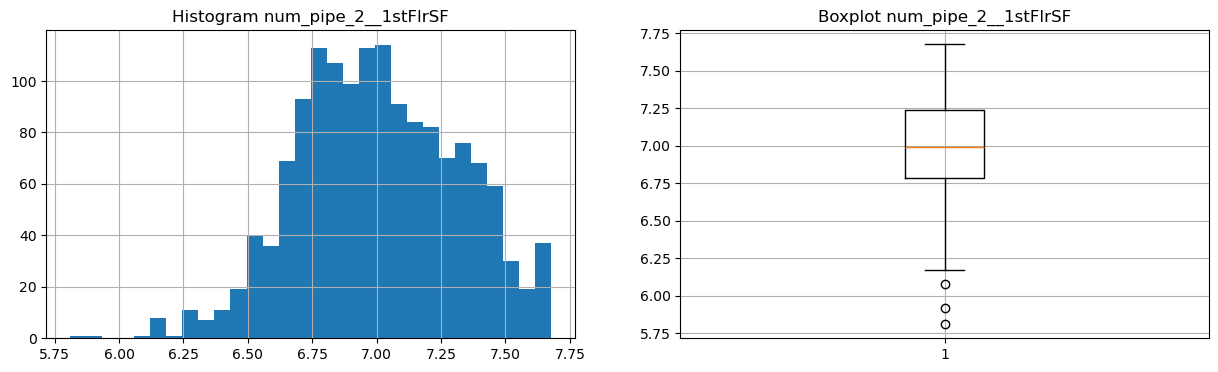

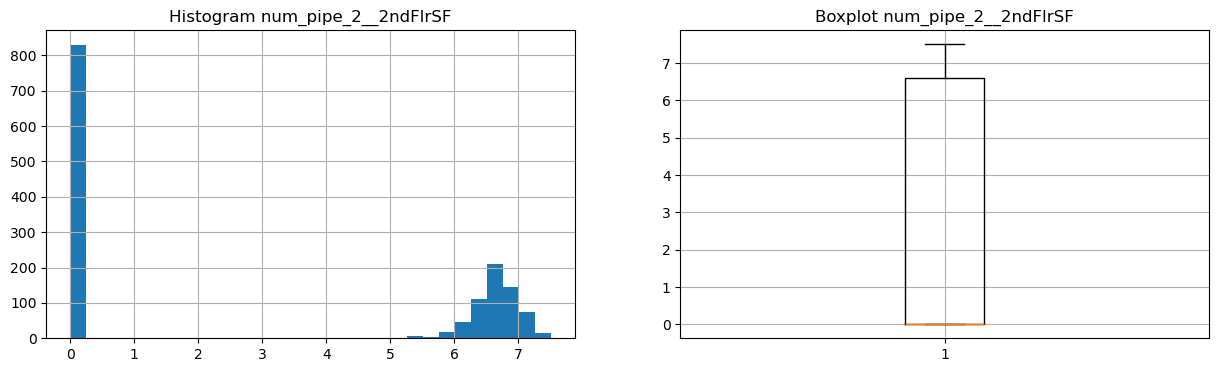

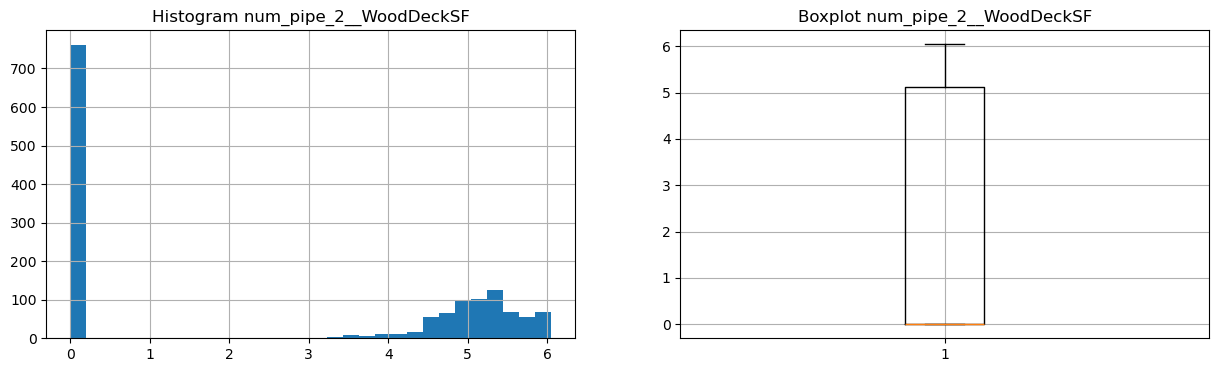

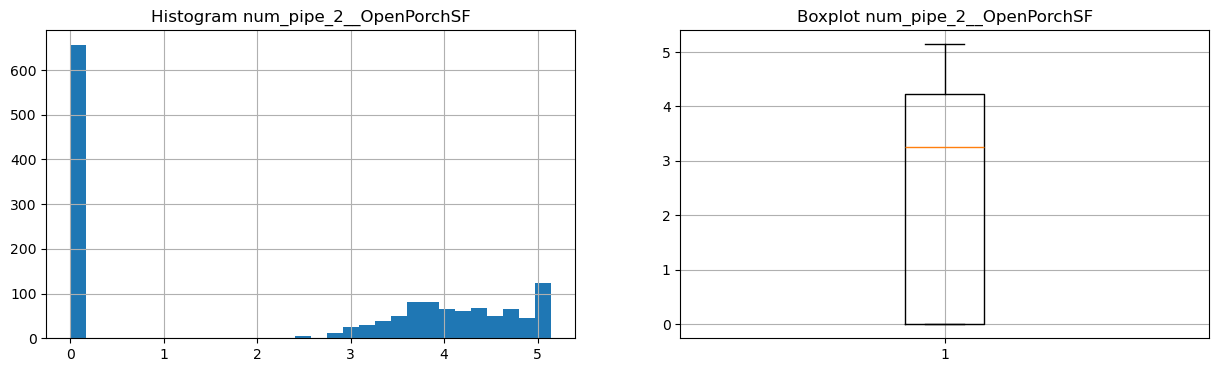

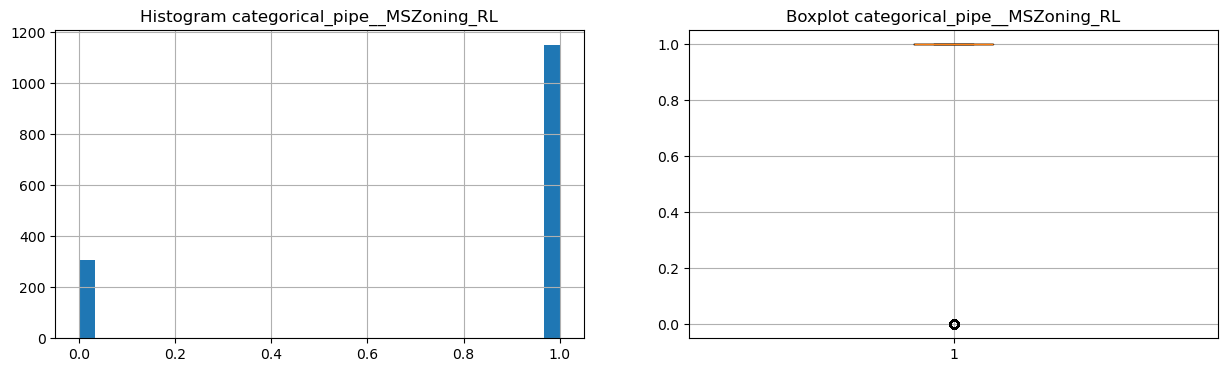

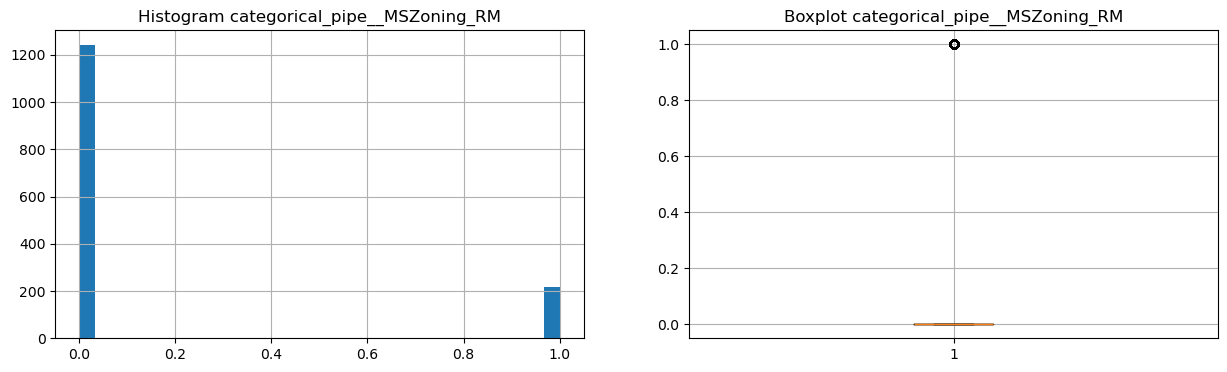

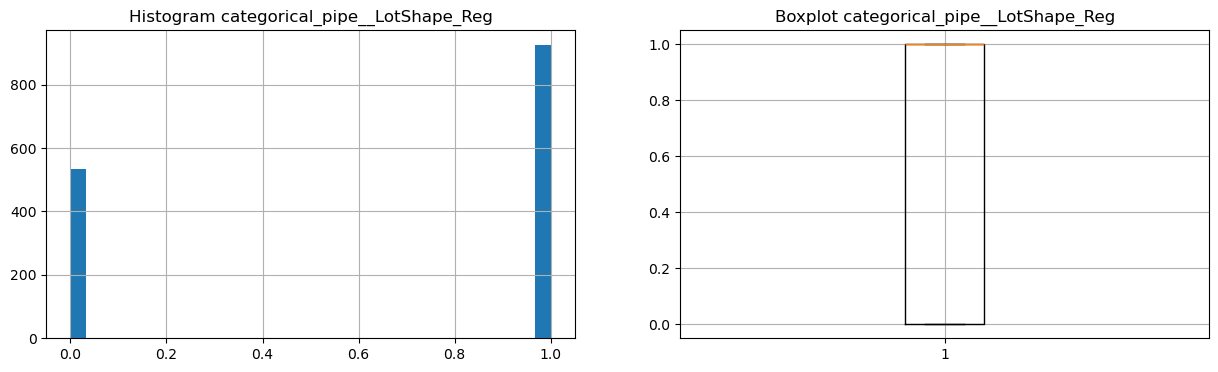

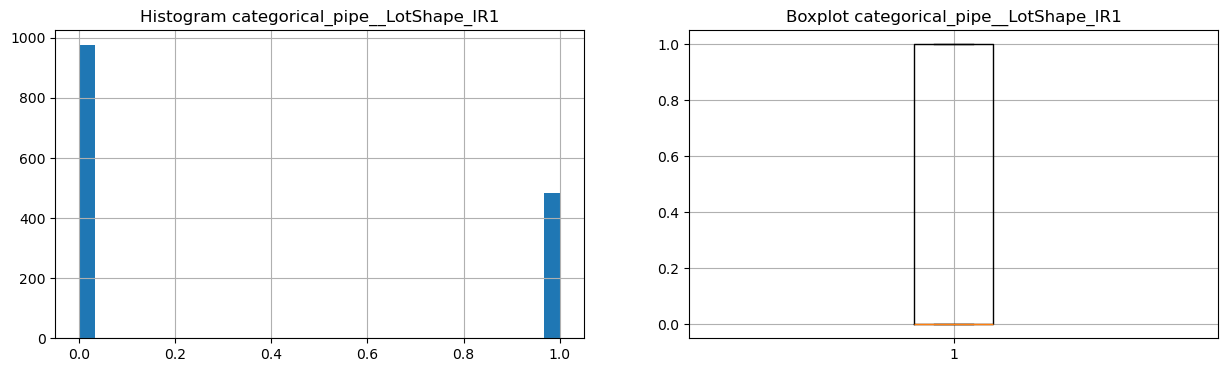

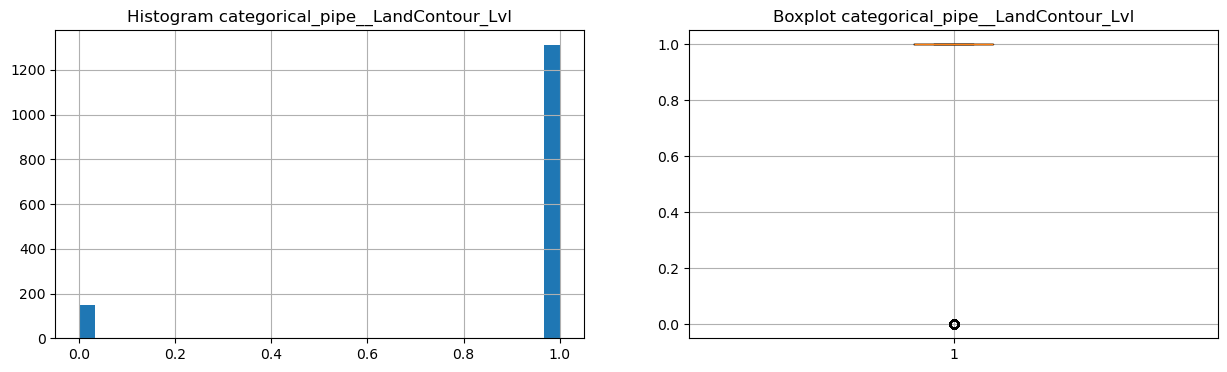

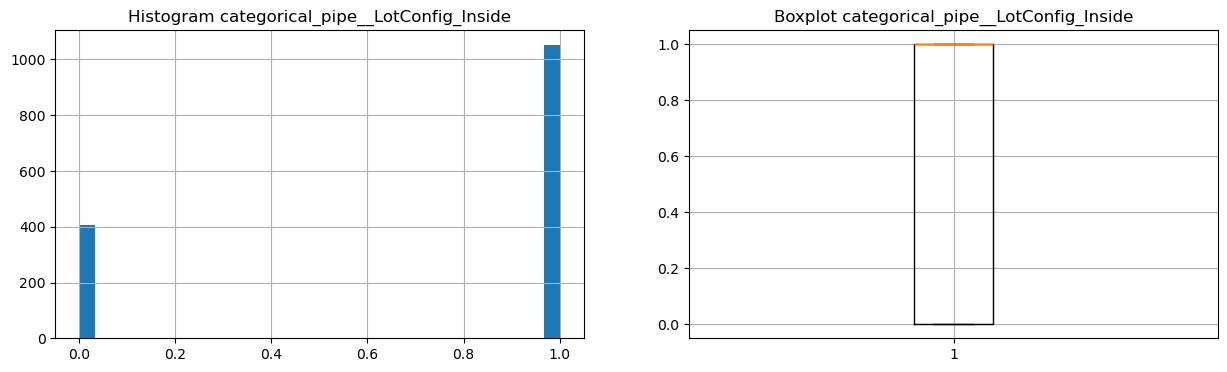

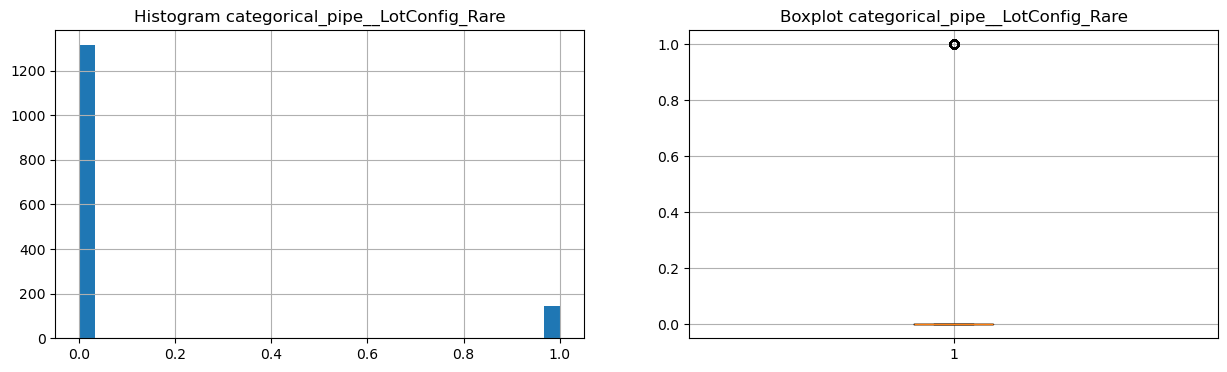

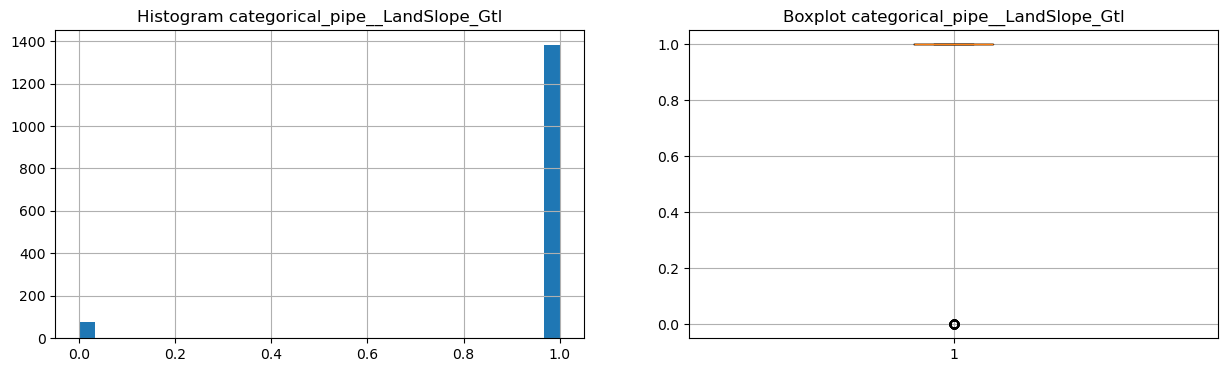

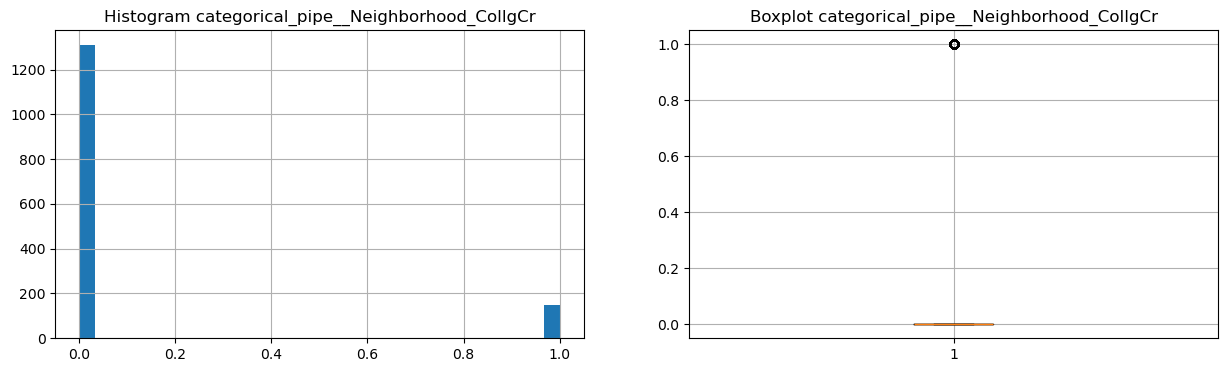

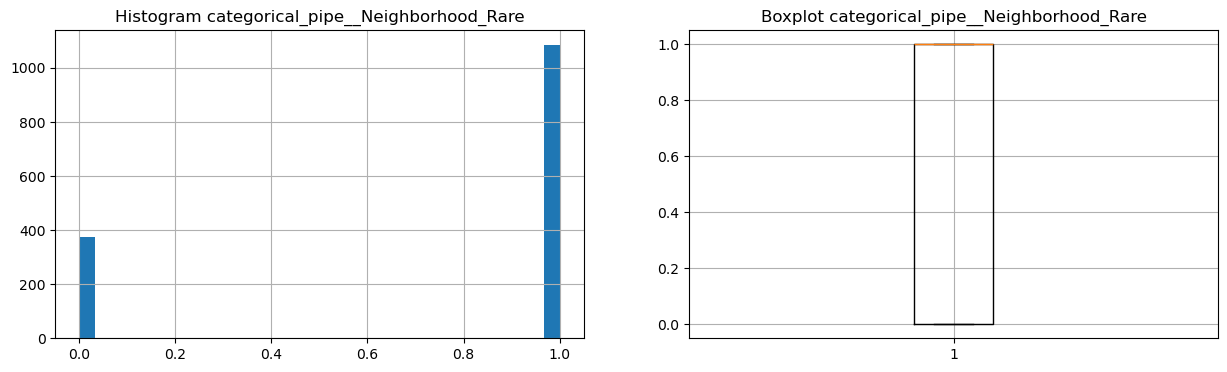

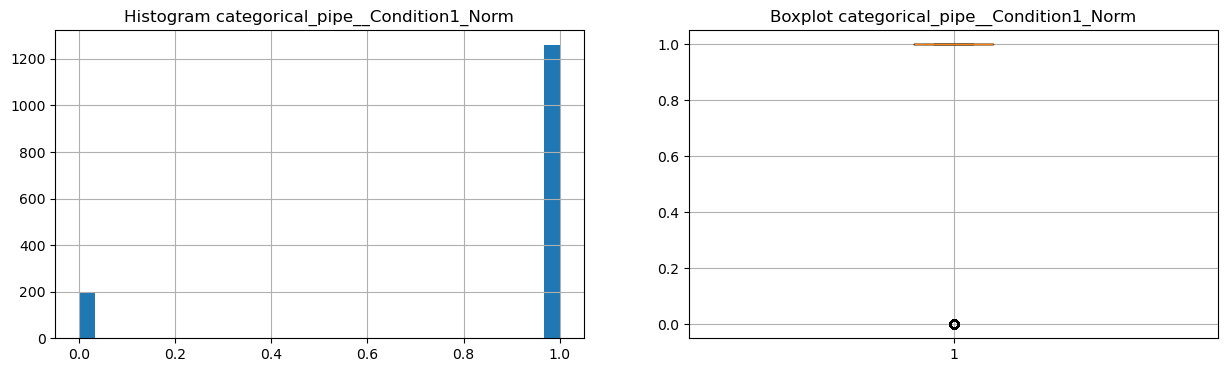

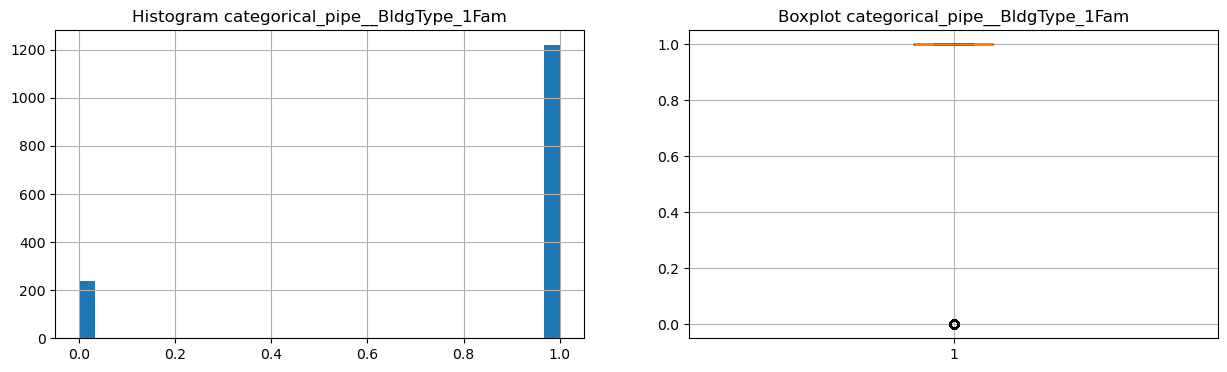

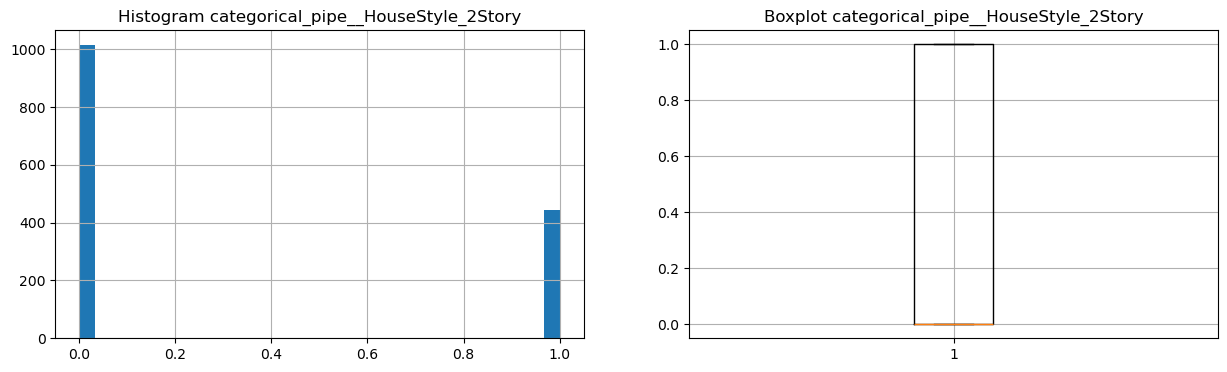

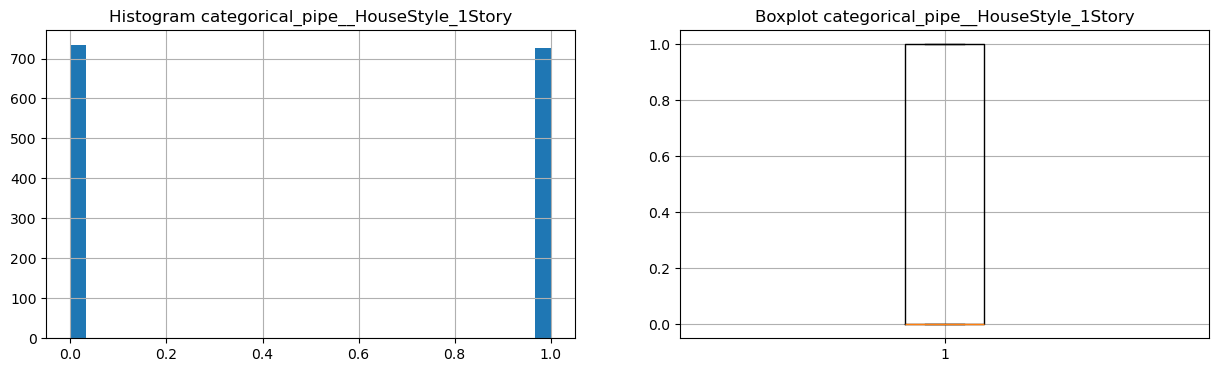

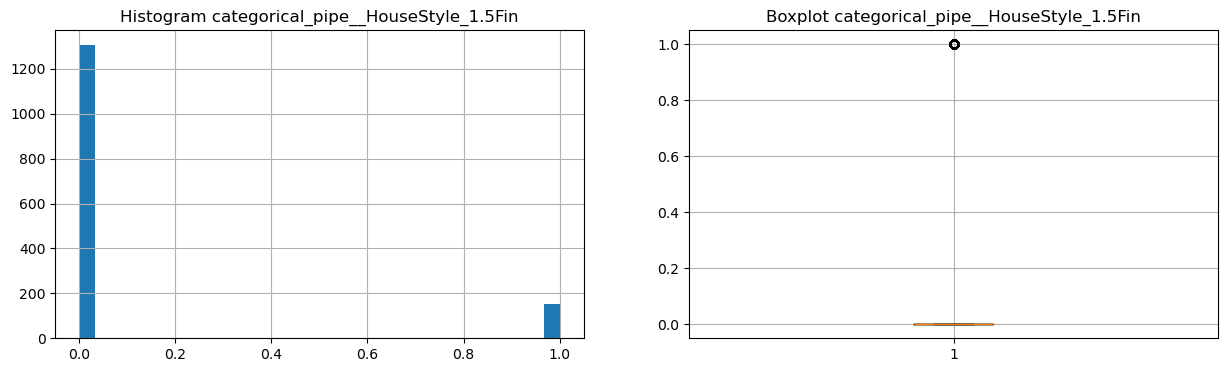

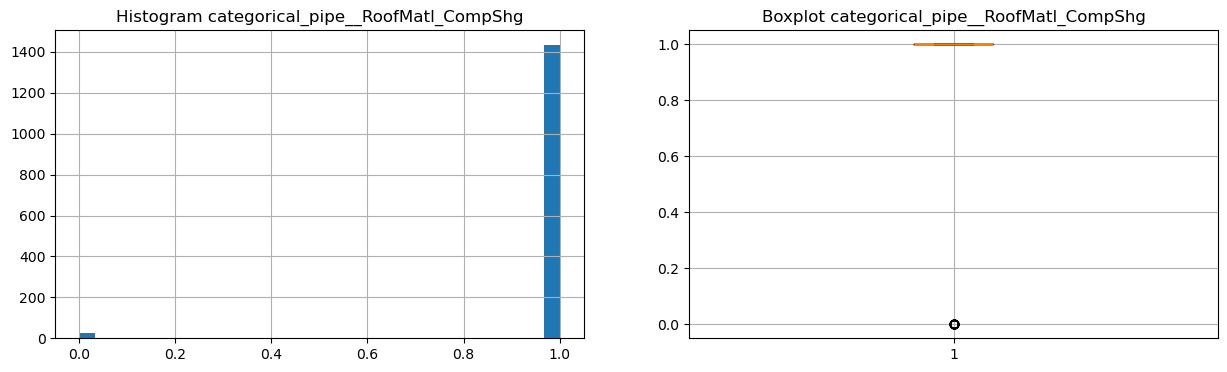

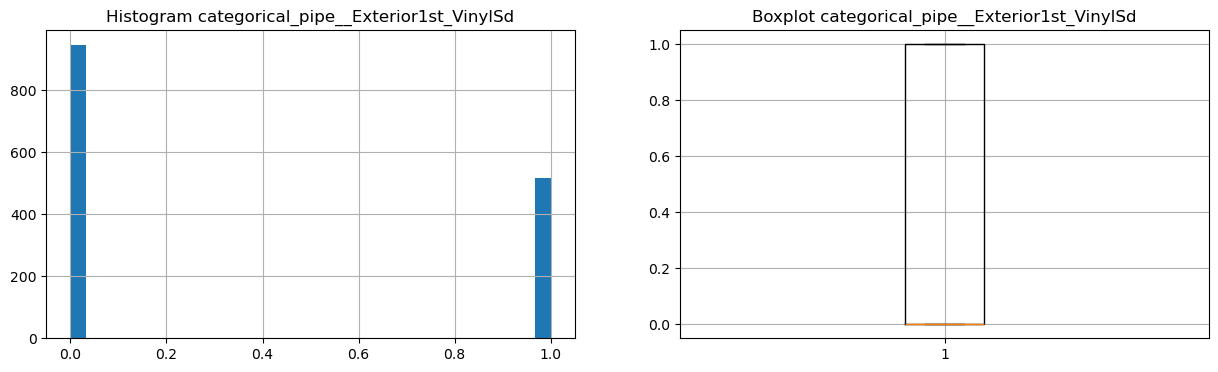

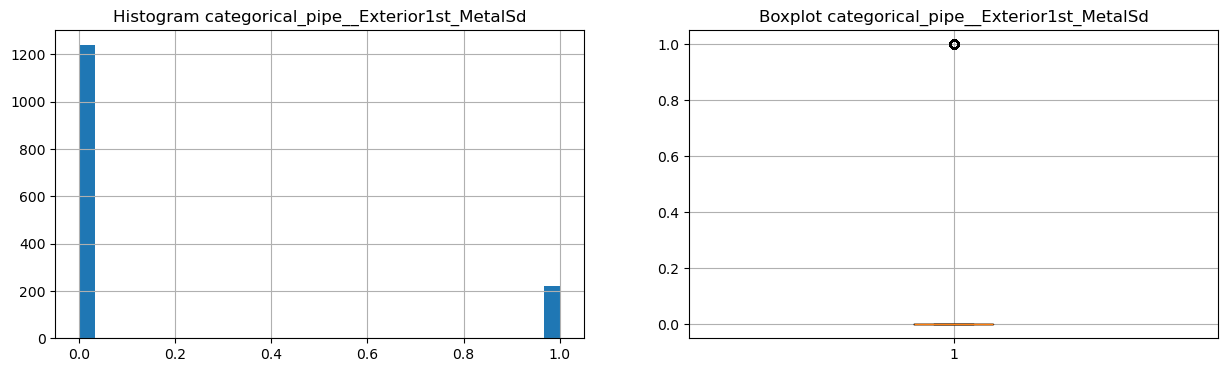

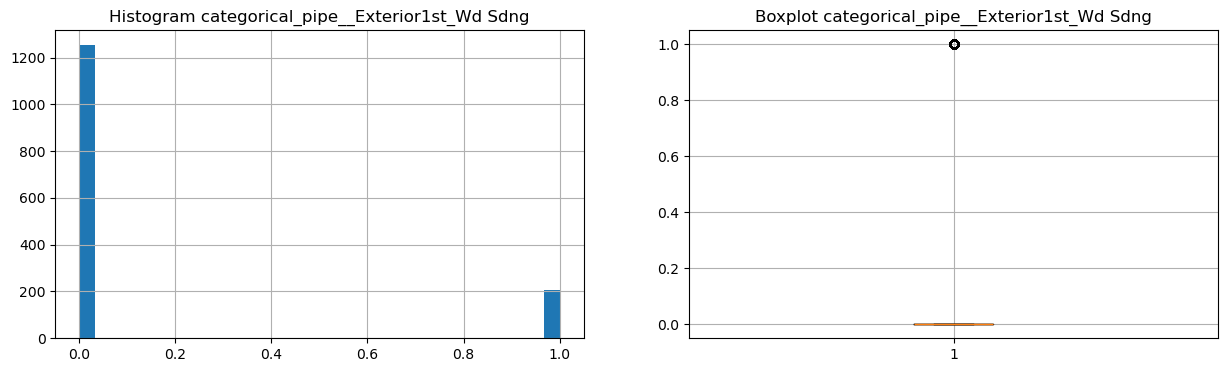

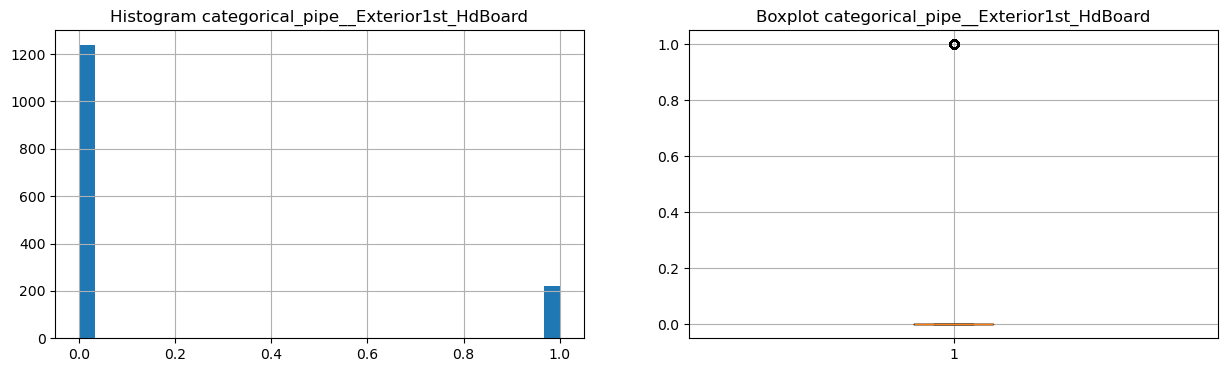

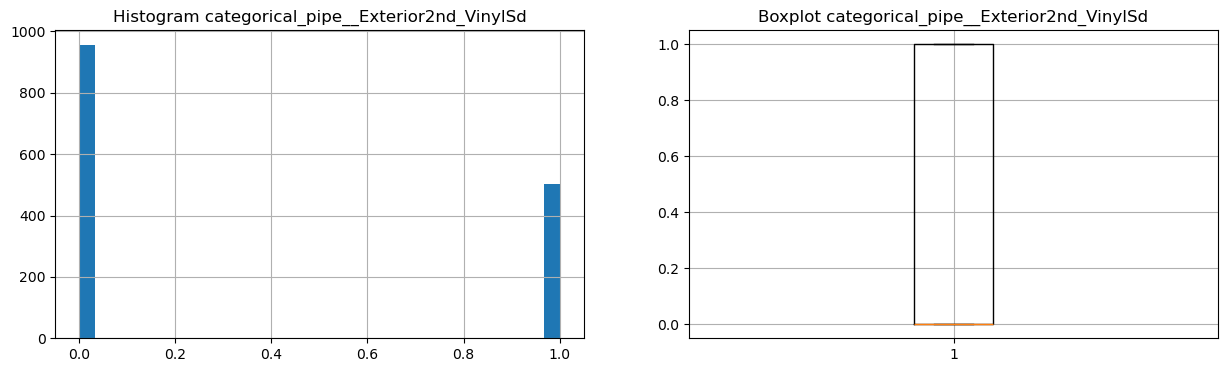

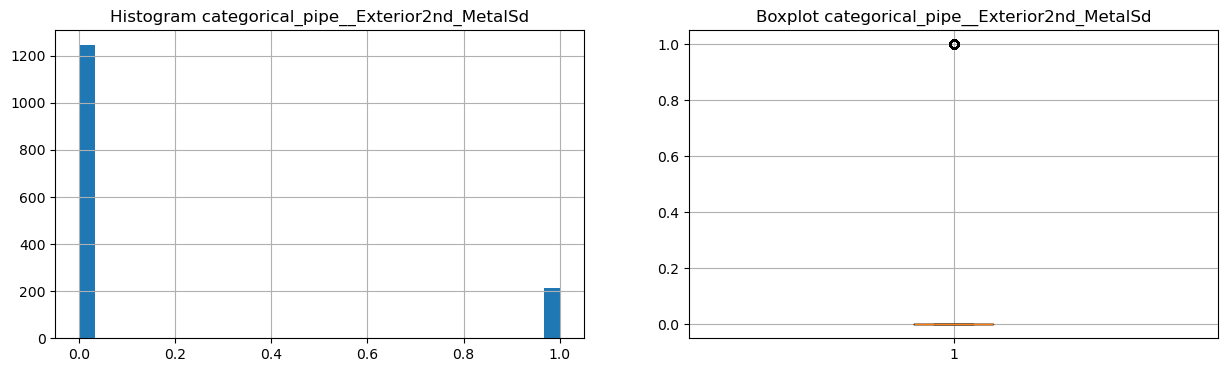

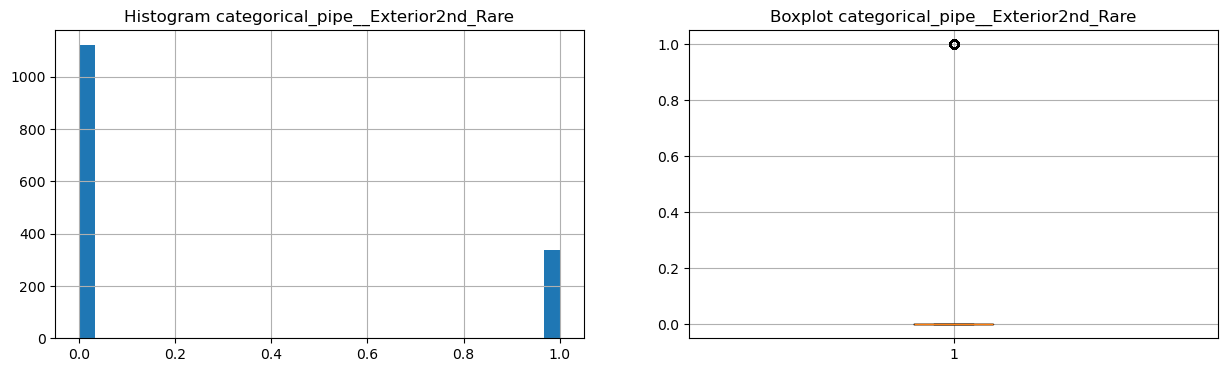

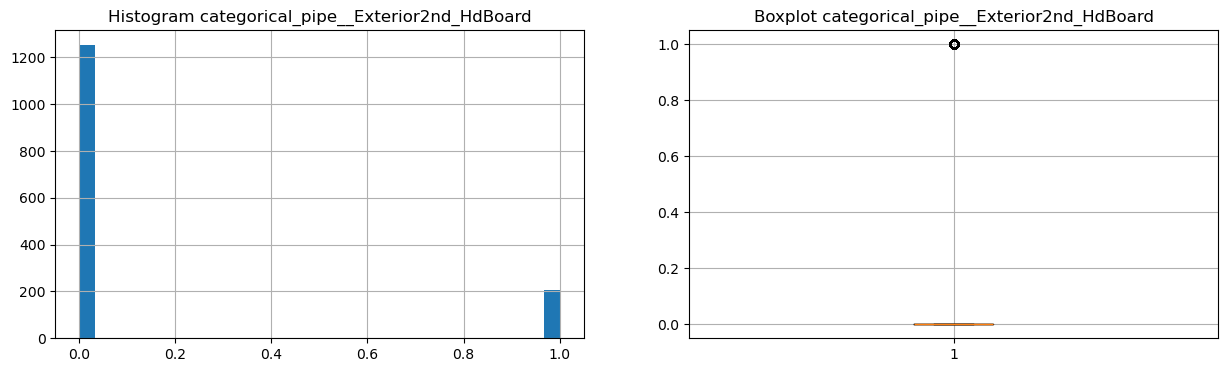

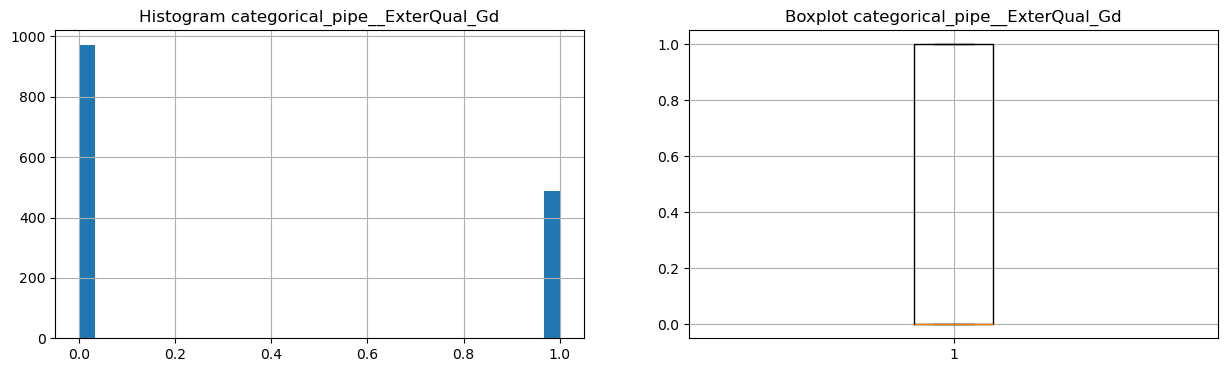

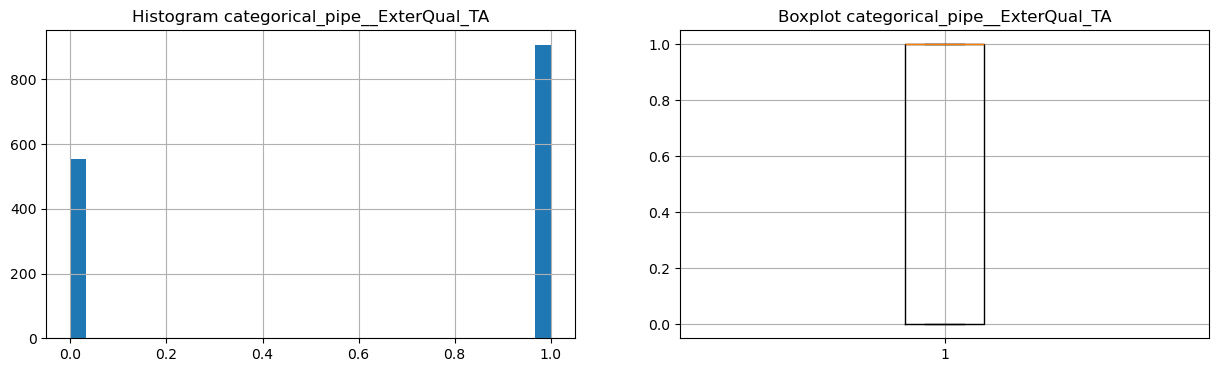

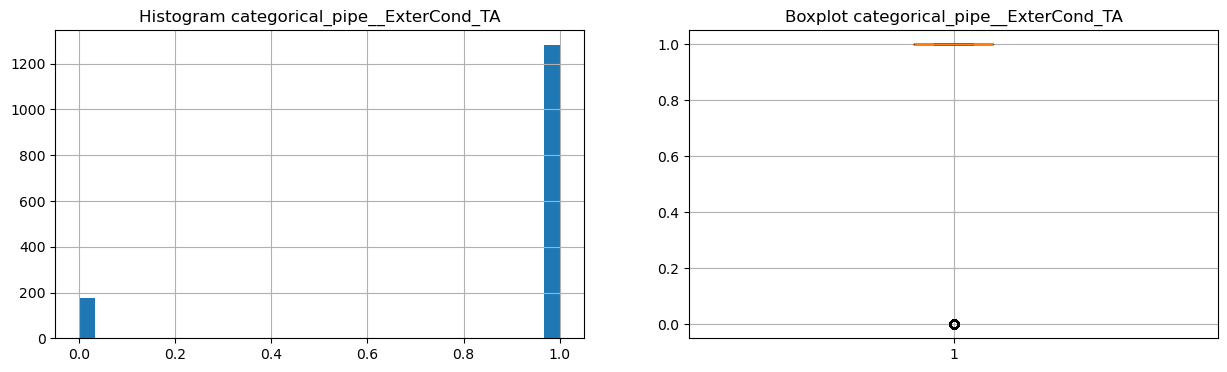

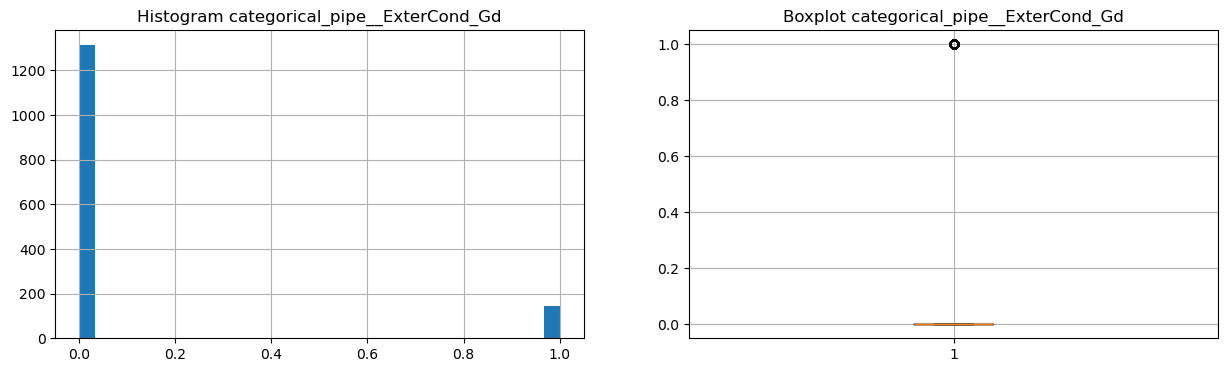

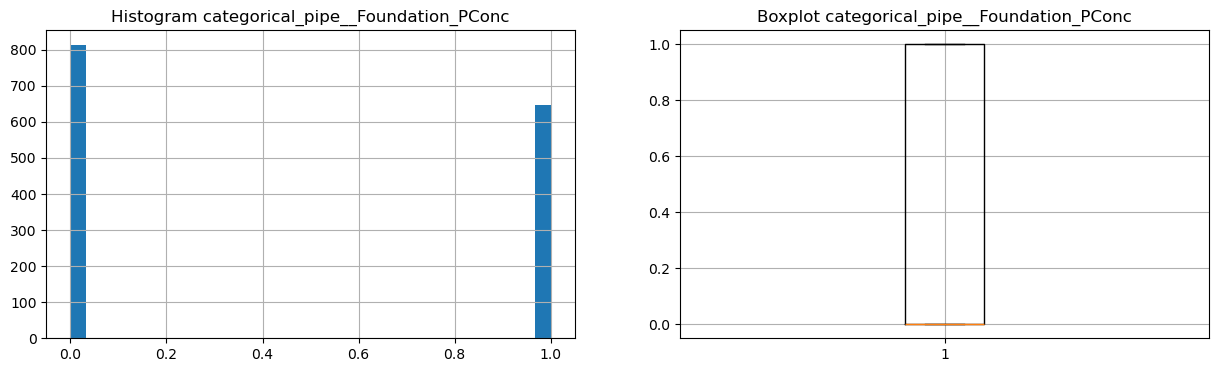

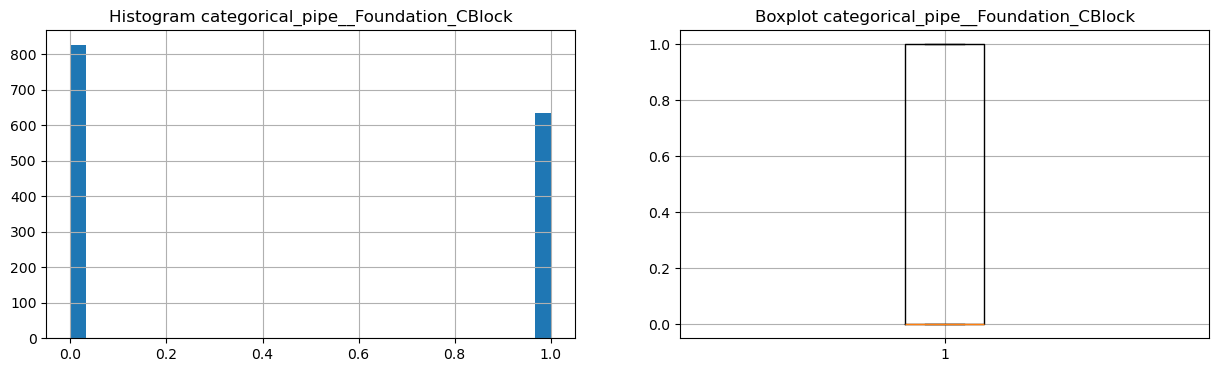

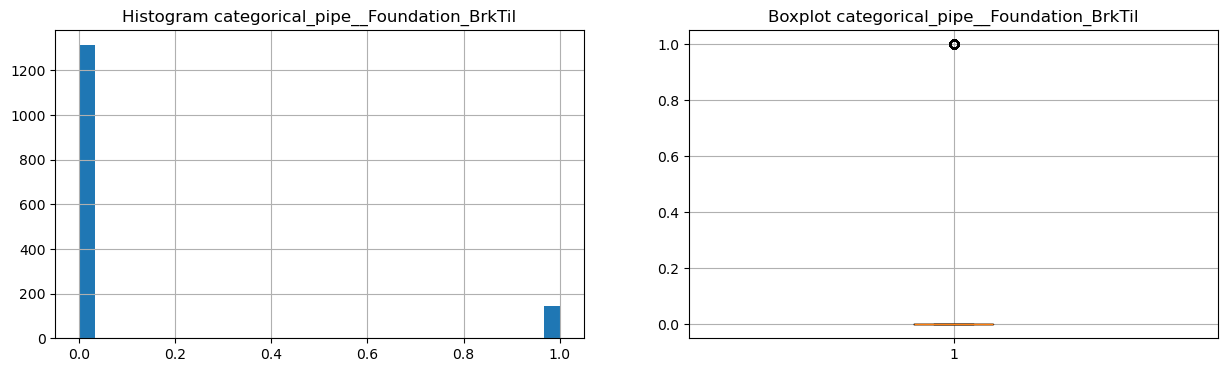

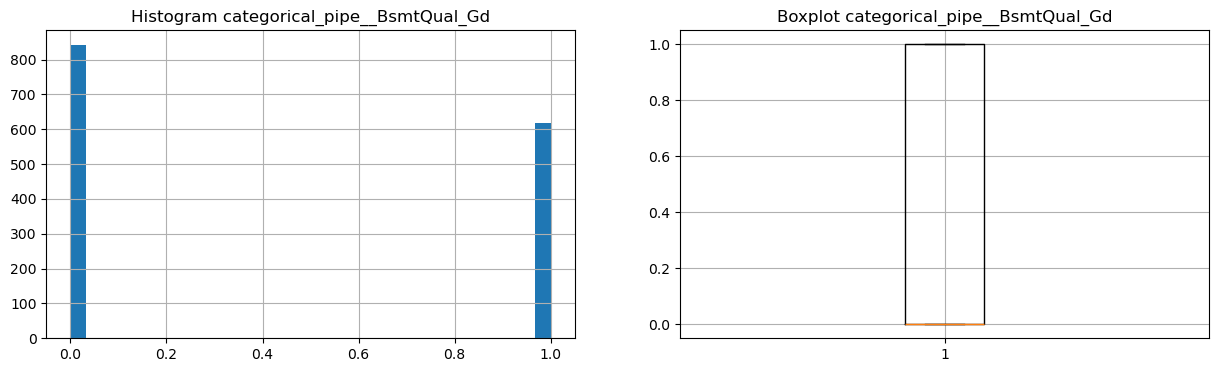

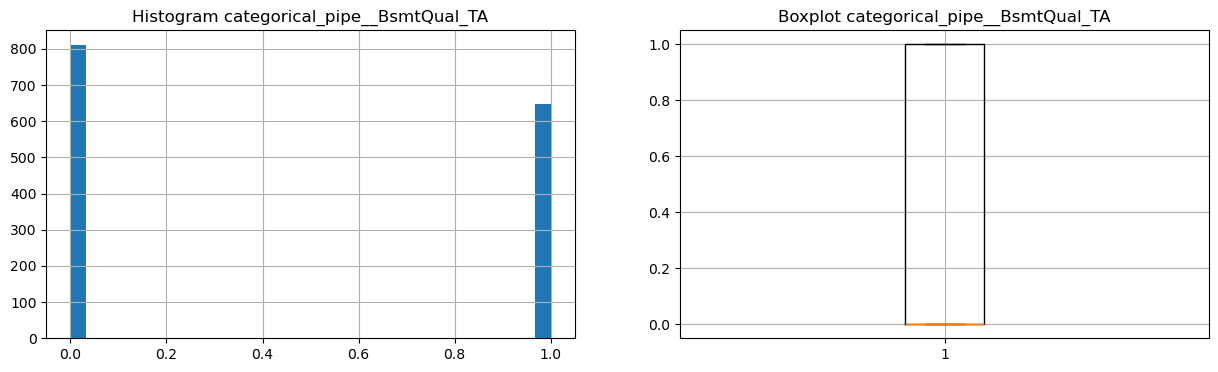

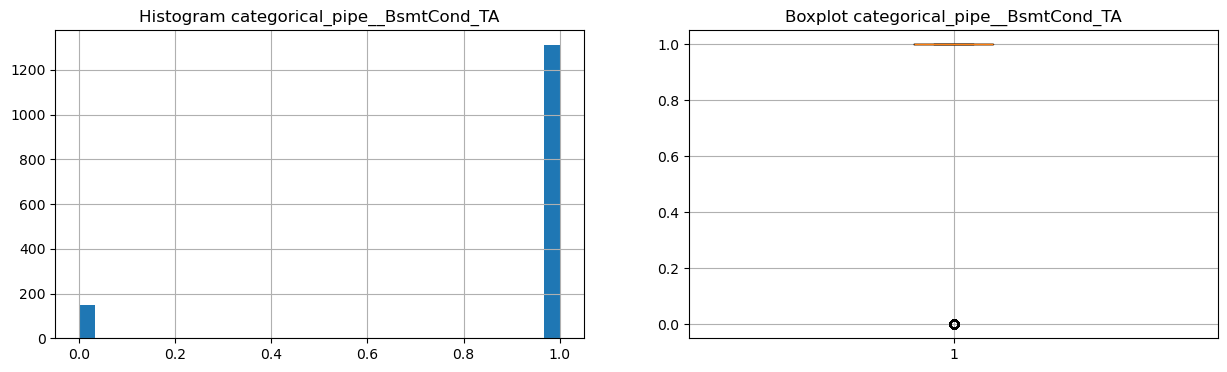

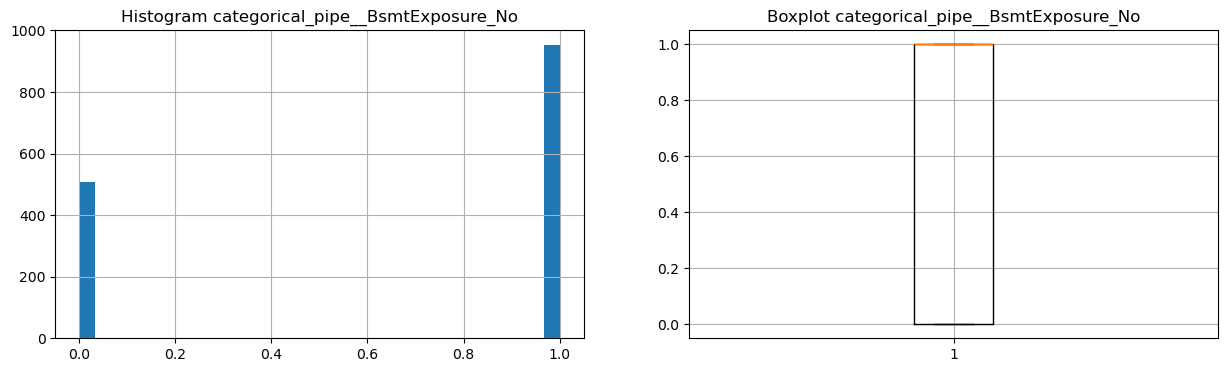

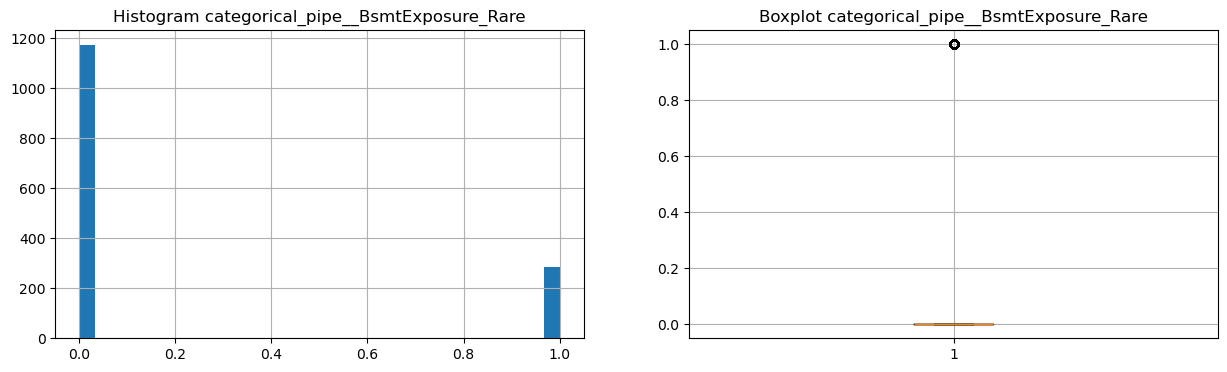

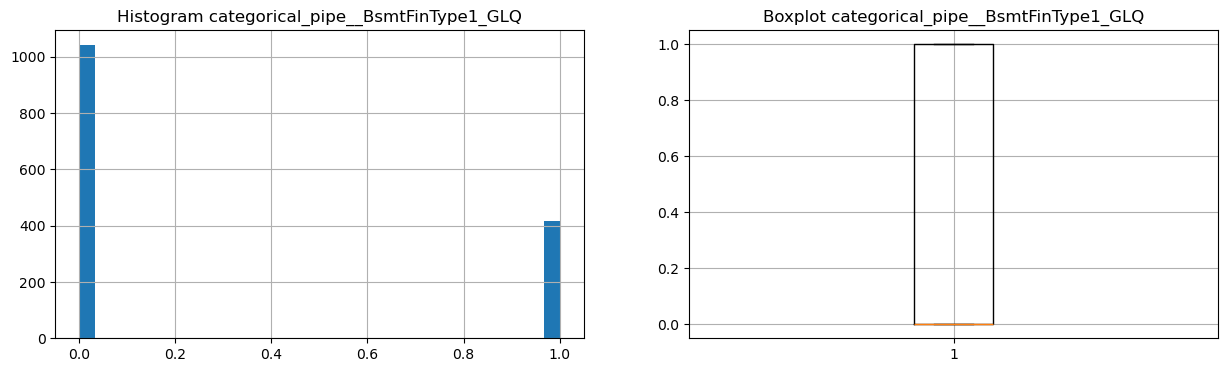

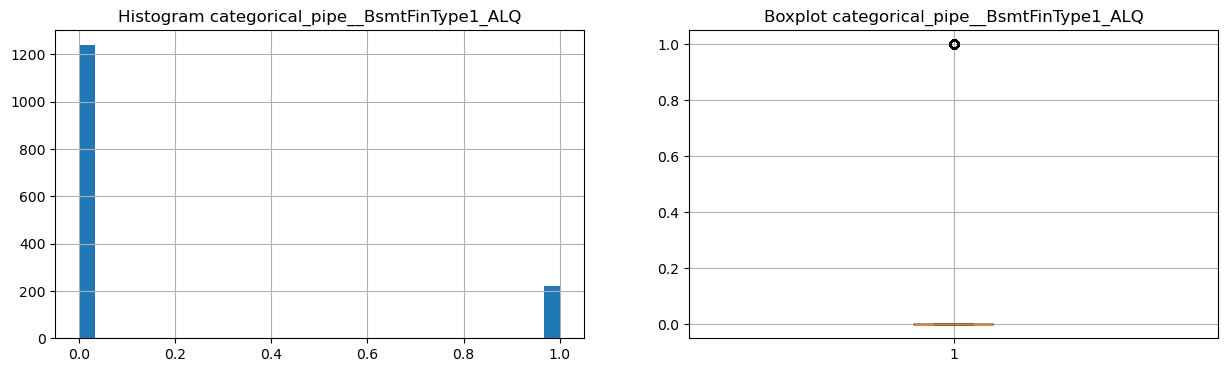

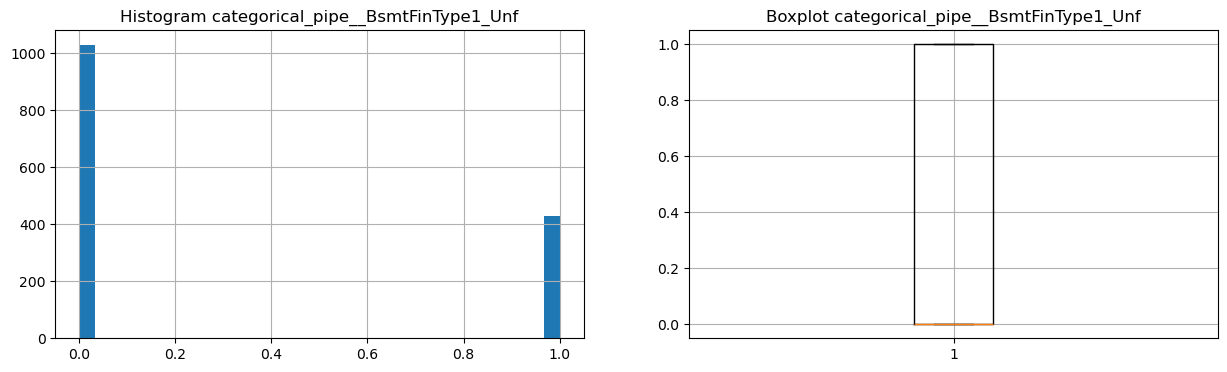

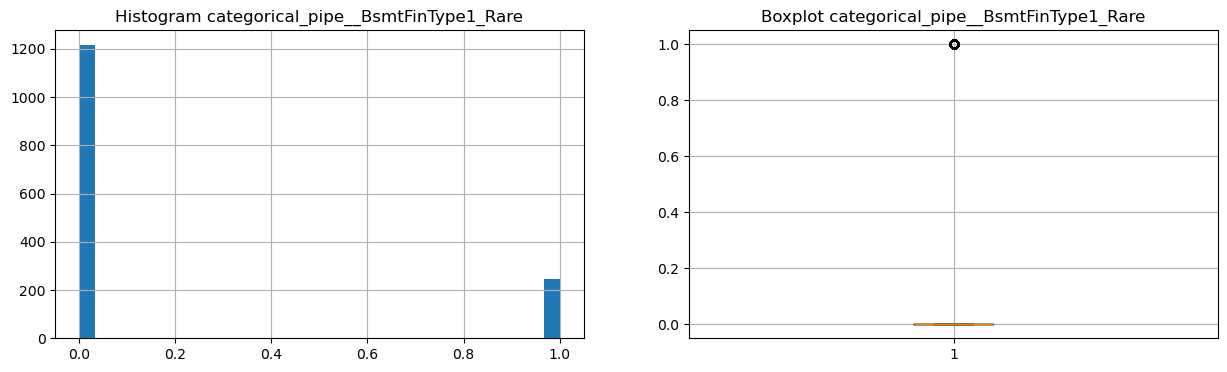

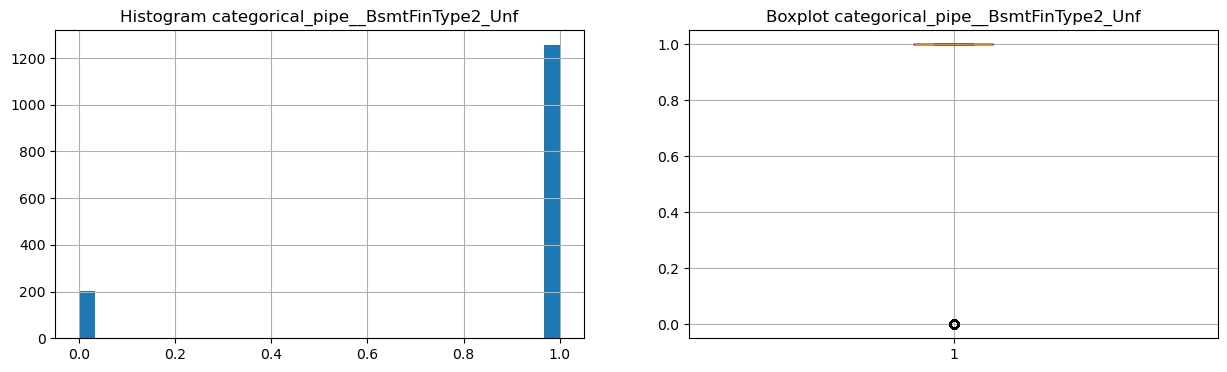

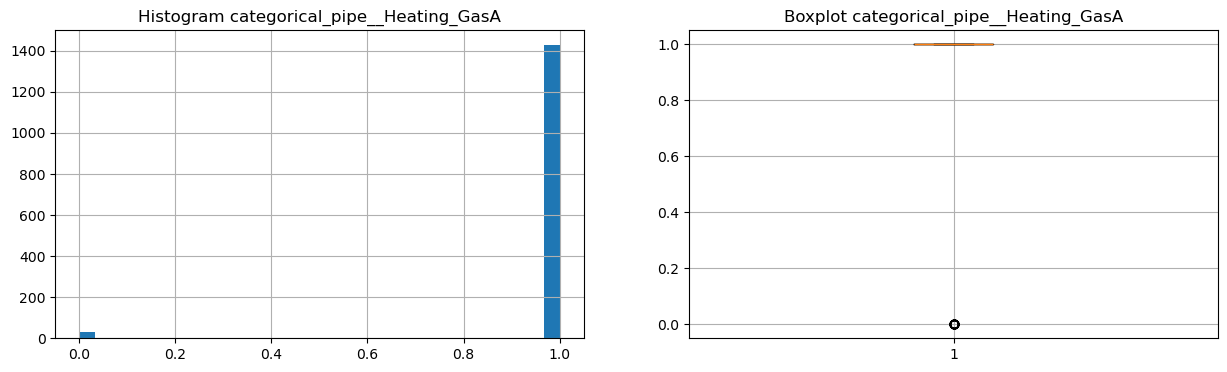

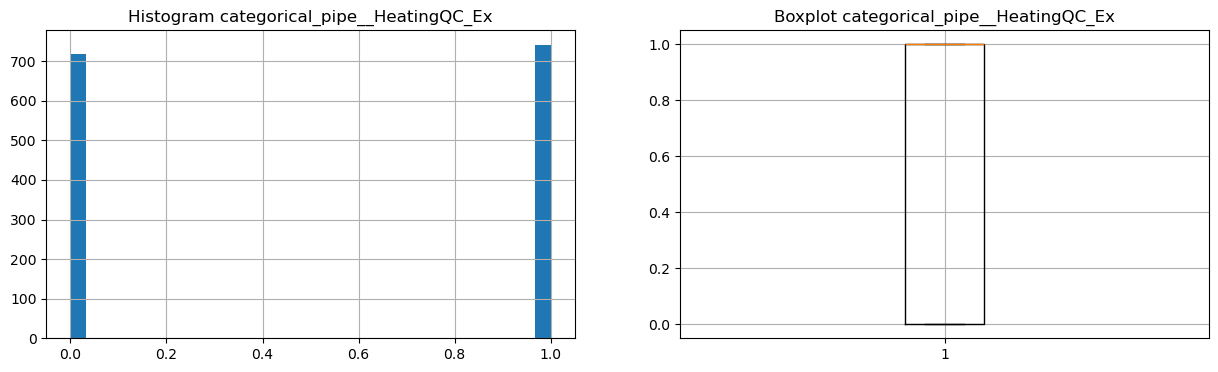

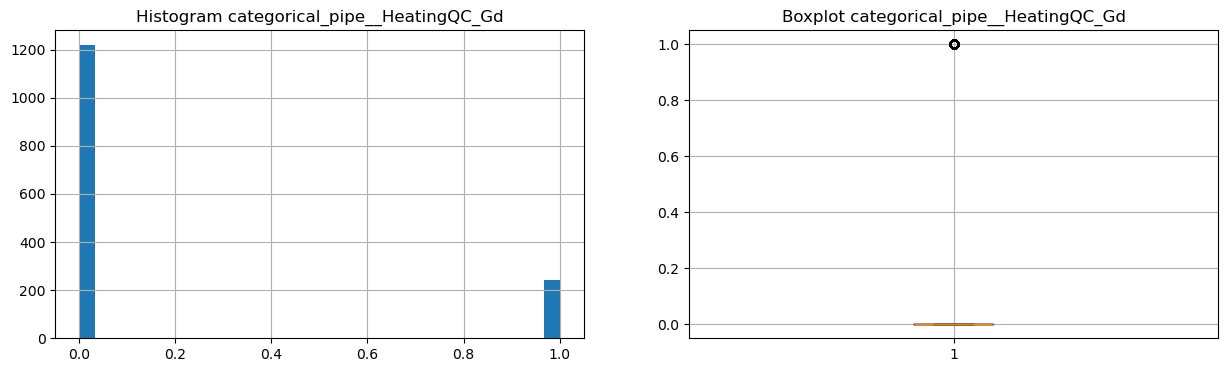

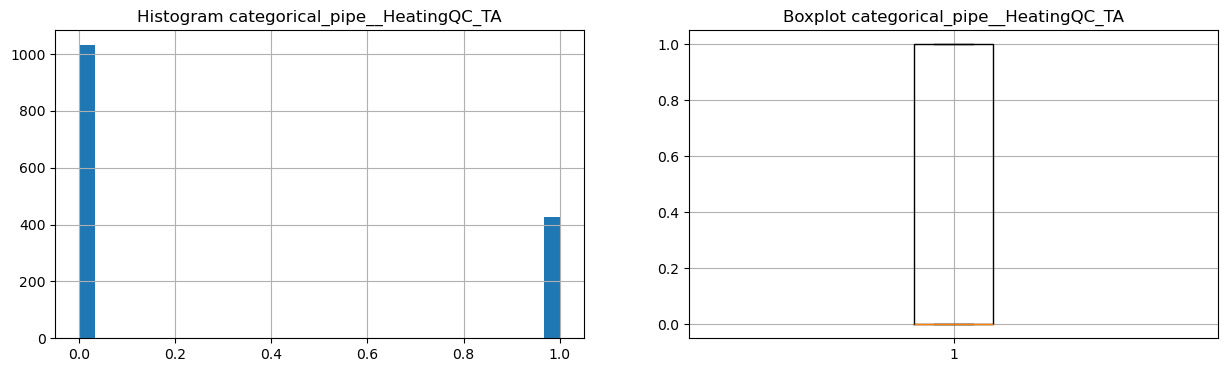

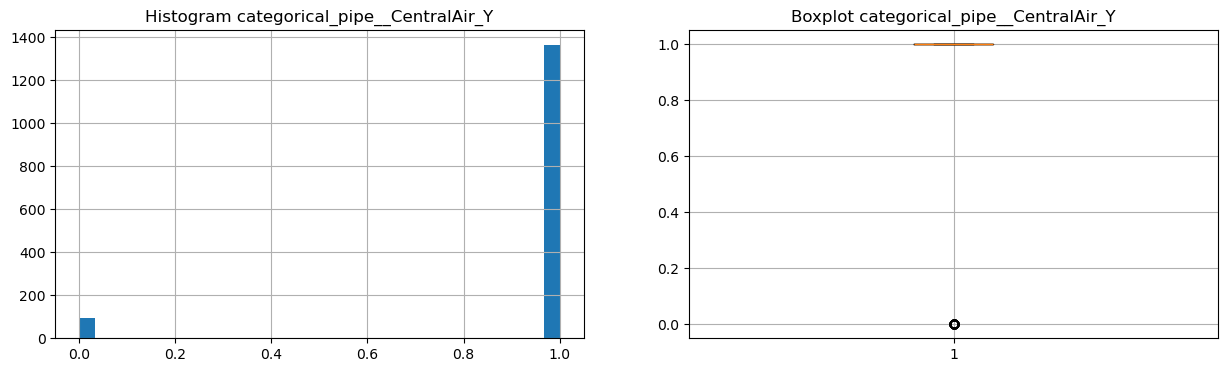

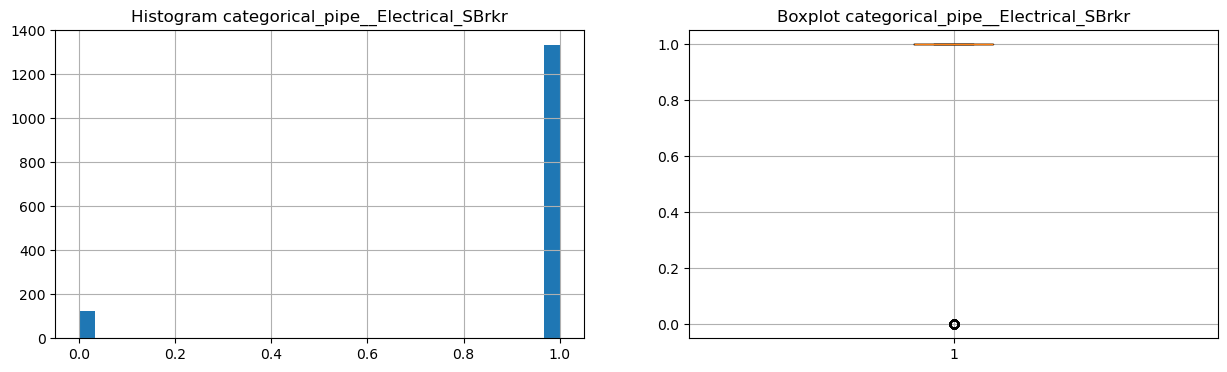

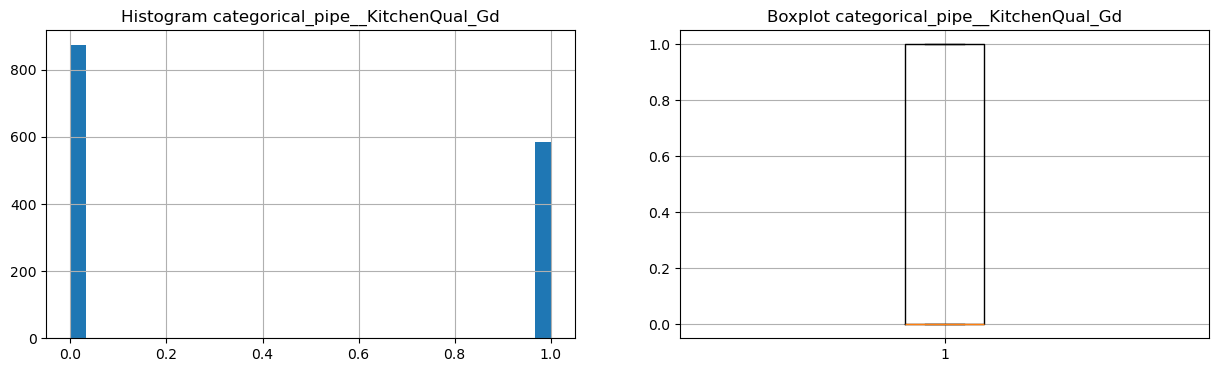

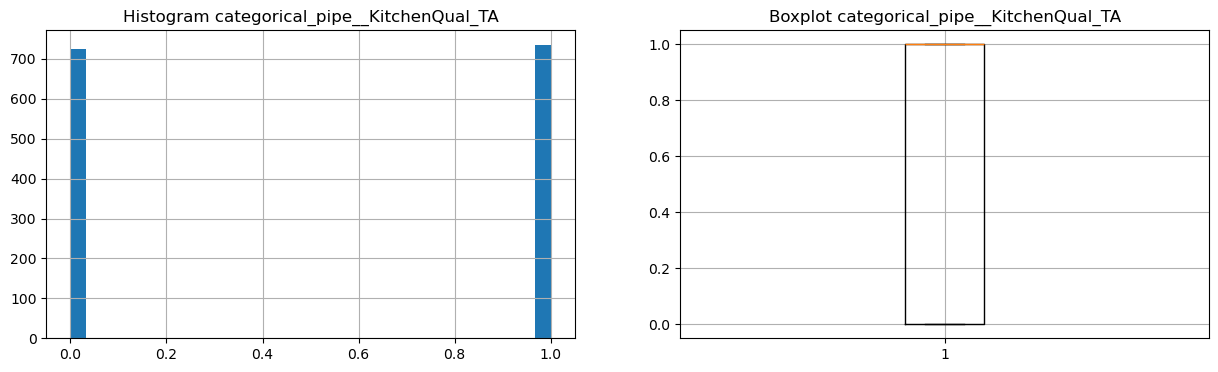

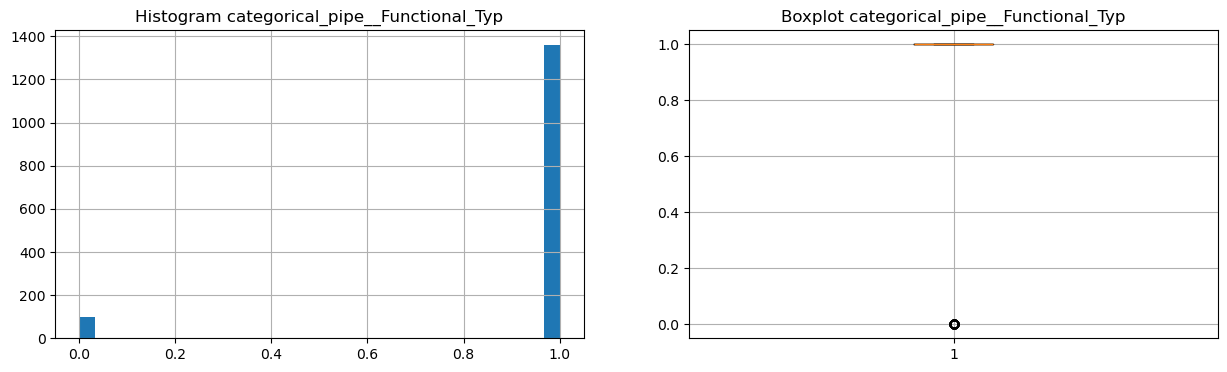

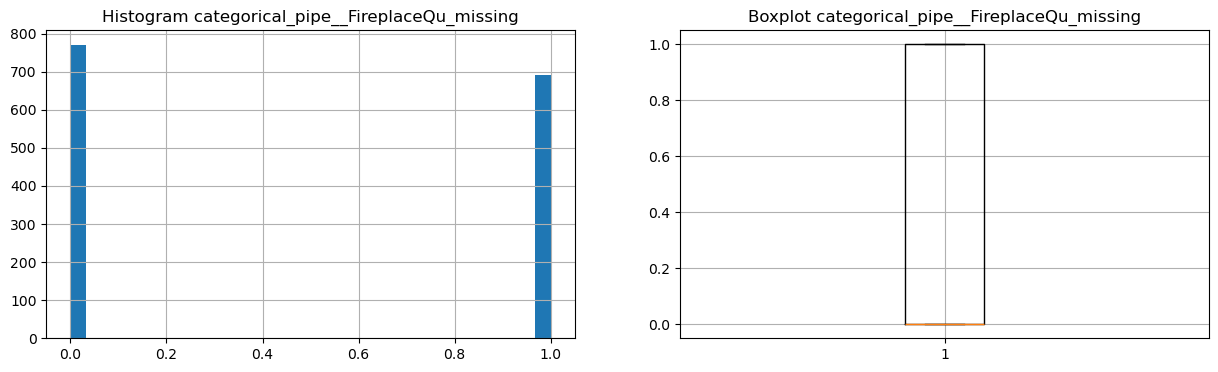

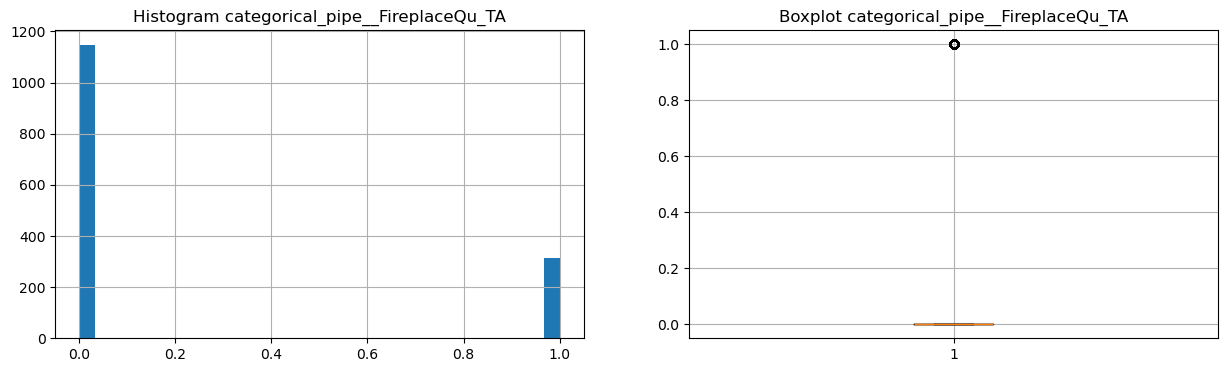

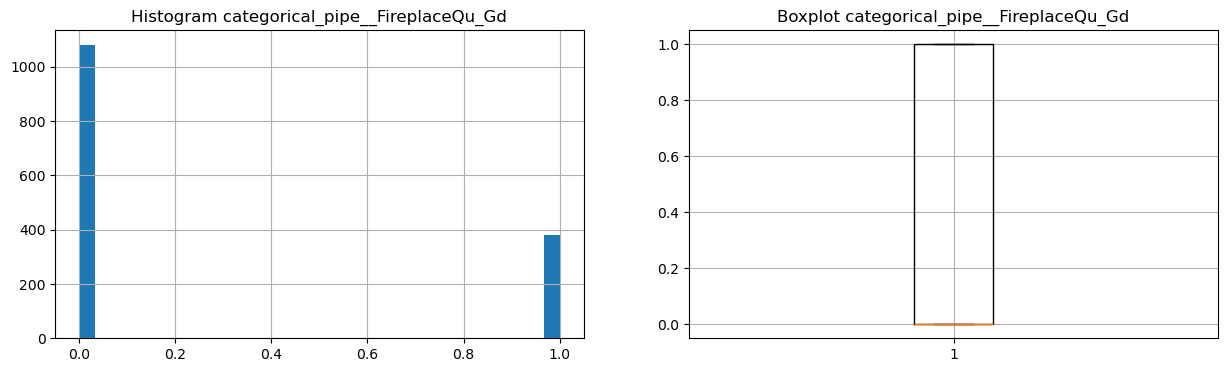

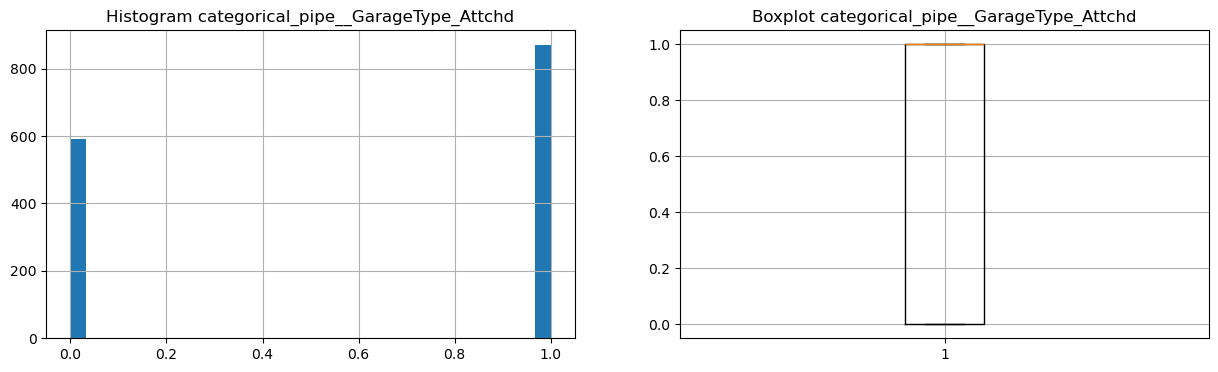

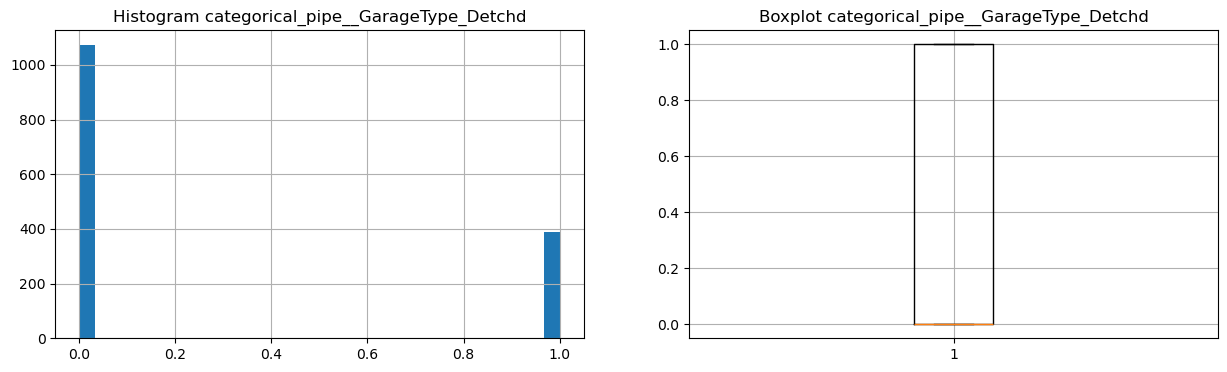

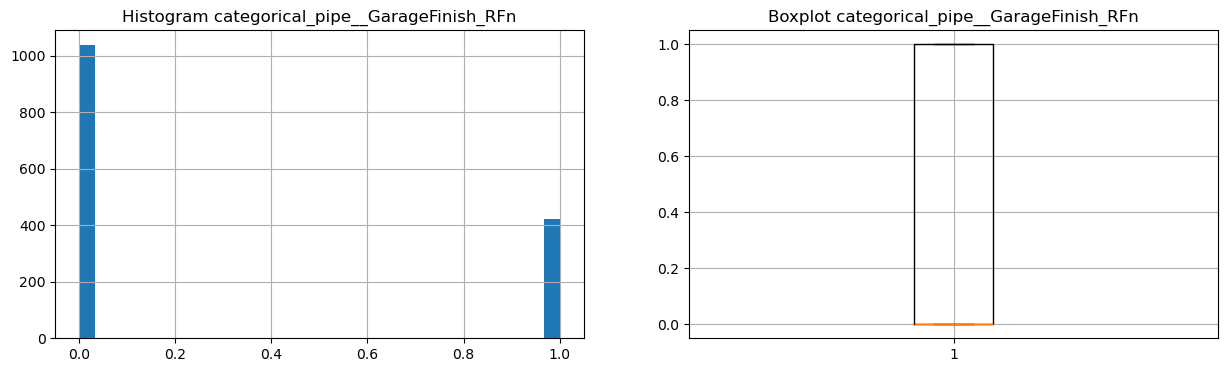

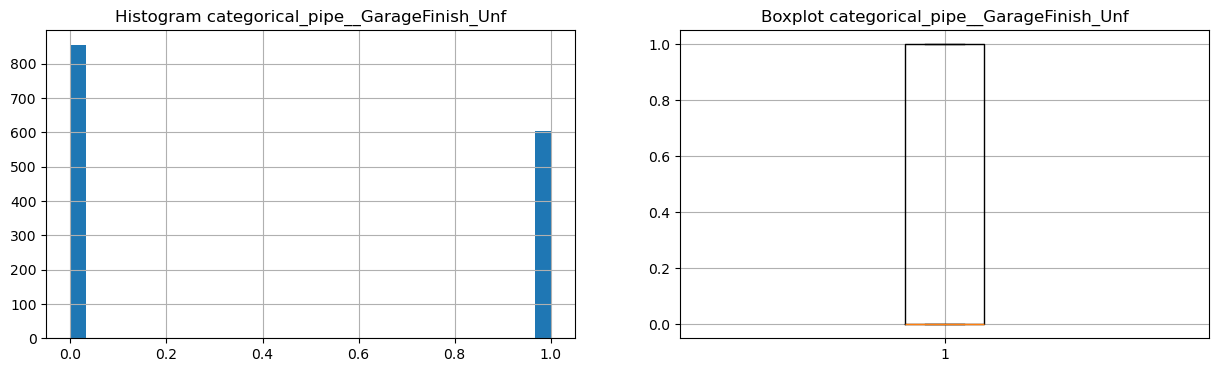

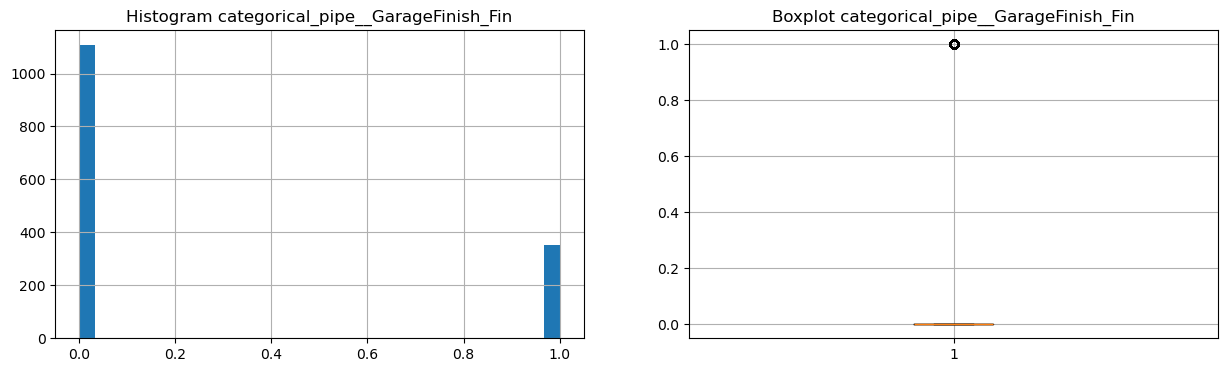

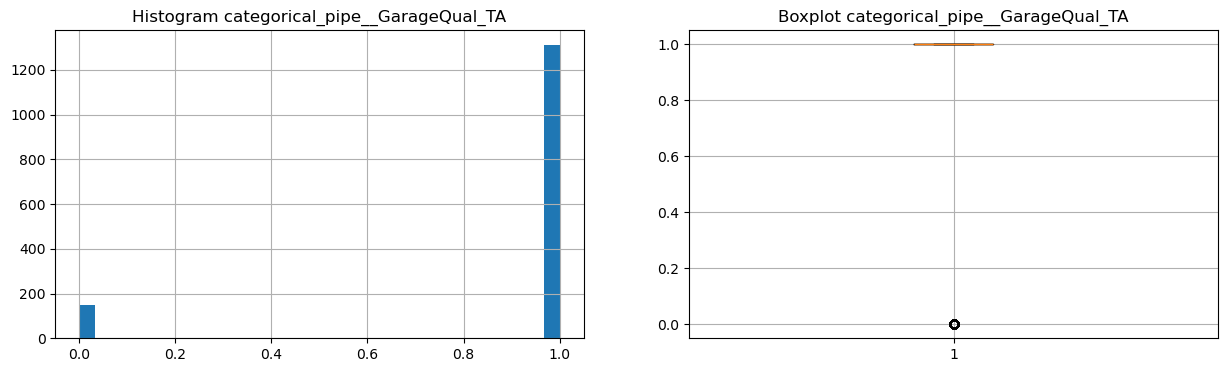

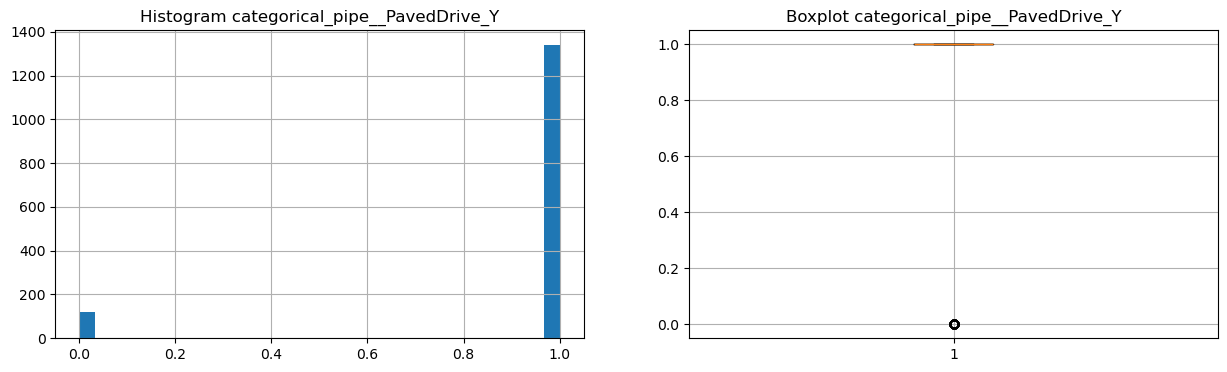

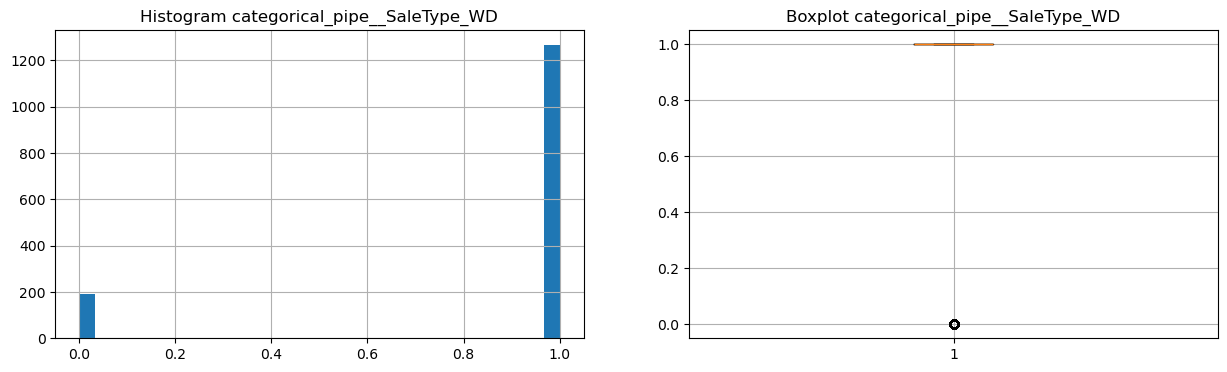

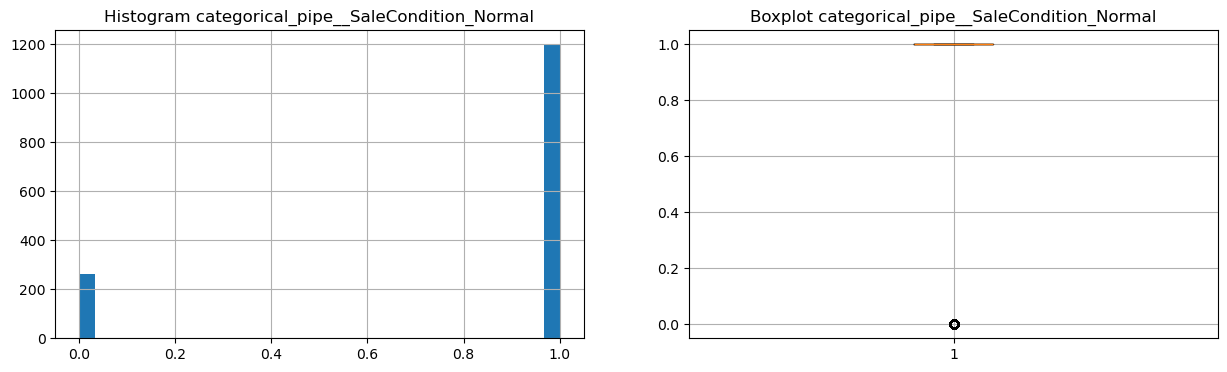

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 1460 and the vector passed to `hue` has length 1.

In [15]:
plot_numerical_data(df_t, target=params['target'])

In [17]:
plot_categorical_data(df_t, target=params['target'])